In [2]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import math
import shap
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
import bamboolib as bam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sys import stdout
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble  import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import glob



### Read Data

In [3]:
## Read Clean Data From Folder
path = r'C_data'
db_dir = glob.glob(path + "/*.csv")

li = []

for i in db_dir:
    df = pd.read_csv(i, index_col=None, header=0)
    li.append(df)
ori_db = pd.concat(li, ignore_index=True)
wtpc = pd.read_csv('Design Capacity WTP.csv')
master_db = pd.merge(ori_db,wtpc[['wtp','Water Source','Lembangan']],on='wtp',how='left')
master_db['Date'] = pd.to_datetime(master_db['Date'])

### Data Cleaning

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sys import stdout
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble  import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import glob


path = r'CP_data'
db_dir = glob.glob(path + "/*.csv")

jam3 = pd.read_csv('CP_data\ChemPare_SgSel_2.csv', index_col=None, header=0)
jam3 = jam3.drop('Unnamed: 0', axis=1)

chem = [
        'Soda_Ash',
        'Liquid_Chlorine',
        'Liquid_Polyaluminium_Chloride',
        'Hydrated_Lime',
        'Aluminium_Sulphate']

wtp_exclude_lst = ['Bernam River Headworks (Old)',
 'Bukit Tampoi New',
 'Salak Tinggi',
 'Sungai Serai',
 'Bernam River Headworks (New)']

jam4 = jam3.copy().fillna(0)

for i in wtp_exclude_lst:
    jam4 = jam4[(jam4['wtp'] != i) ]
#select the lembangan

#jam4 = jam4[jam4['Lembangan'] == 'Sg Selangor']
#jam4 = jam4[(jam4['wtp'] == 'Sungai Selangor Fasa 2 Stream C' )]
jam4['Soda_Ash'] = jam4.apply(lambda row: row['Soda_Ash_T'] + row['Soda Ash'], axis=1)
jam4['Liquid_Chlorine'] = jam4.apply(lambda row: row['Liquid_Chlorine_T'] + row['Liquid Chlorine'], axis=1)
jam4['Liquid_Polyaluminium_Chloride'] = jam4.apply(lambda row: row['Liquid Polyaluminium Chloride (mg/L)'] + row['Liquid Polyaluminium Chloride'], axis=1)
jam4['Hydrated_Lime'] = jam4.apply(lambda row: row['Hydrated Lime'] + row['Hydrated_Lime_Pow_T'], axis=1)
jam4['Aluminium_Sulphate'] = jam4.apply(lambda row: row['Liquid Aluminium Sulphate'] + row['Kibbled Aluminium Sulphate'], axis=1)
jam4['Sodium_Silico_Fluoride'] = jam4.apply(lambda row: row['Sodium Silico Fluoride'] + row['Sodium Silico Fluoride (mg/L)'], axis=1)

jam4 = jam4.drop(['Sodium Aluminosilicate','Flopam FA 920 PWG','Raw Water Polyelectrolyte 4290 PWG / 4190 PWG / AN910 (mg/L)','Flopam FO 4290 PWG','Sodium_Silico_Fluoride','Microsand','Sodium Silico Fluoride (mg/L)','Sodium Silico Fluoride','Kibbled Aluminium Sulphate','Liquid Aluminium Sulphate','Hydrated Lime','Hydrated_Lime_Pow_T','Soda_Ash_T','Soda Ash','Liquid_Chlorine_T','Liquid Chlorine','Liquid Polyaluminium Chloride (mg/L)','Liquid Polyaluminium Chloride'],axis = 1)

idv = ['pH_avg', 'Turbidity_avg', 'Color_avg', 'Iron_avg', 'Ammonia_avg', 'Manganese_avg']
exclude = ['Month', 'Quarter', 'Water Source', 'Lembangan', 'wtp', 'Date']

tv = [col for col in jam4.columns if col not in idv and col not in exclude]

jam4[tv] = jam4[tv].fillna(0)

# MLD_dict = {'Batang Kali':17,
#        'Kuala Kubu Bharu':22, 'Rasa':809,
#         'Rantau Panjang New':120, 'Rantau Panjang Old':120, 'Sungai Rangkap':23,
#        'Sungai Selangor Fasa 1':3501, 'Sungai Selangor Fasa 3':3074,'Sungai Selangor Fasa 2 Stream C':3617}

# jam4_i = jam4.copy()
# for key, value in MLD_dict.items():
#     # Check if the key is in the DataFrame
#     if key in jam4_i['wtp'].tolist():
#         # Set the value in the new column where the feature matches the key
#         jam4_i.loc[jam4_i['wtp'] == key, 'MLD'] = value

# chem = [
#         'Soda_Ash',
#         'Liquid_Chlorine',
#         'Liquid_Polyaluminium_Chloride',
#         'Hydrated_Lime',
#         'Aluminium_Sulphate']

# for i in chem:
#     jam4_i[i] = jam4_i[i]/jam4_i['MLD']


# jam4_i = jam4_i.drop('MLD',axis = 1)

# jam5 = pd.DataFrame()
# ge2 = idv+chem
# for i in ge2:
    
#     if i==ge2[0]:
#         m0 = jam4_i[~jam4_i.groupby(['wtp'])[i].apply(is_outlier)][['wtp',i,'Date']]
#         jam5 = jam5.append(m0)
#     else:
#         m1 = jam4_i[~jam4_i.groupby(['wtp'])[i].apply(is_outlier)][['wtp',i,'Date']]
#         jam5 = pd.merge(jam5,m1,on=['wtp','Date'],how='left')

jam5 = jam4.dropna()



### Modelling

In [26]:
X = jam5[idv].copy()
y = jam5[tv].copy()

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

In [27]:
idv

['pH_avg',
 'Turbidity_avg',
 'Color_avg',
 'Iron_avg',
 'Ammonia_avg',
 'Manganese_avg']

In [28]:
tv

['Soda_Ash',
 'Liquid_Chlorine',
 'Liquid_Polyaluminium_Chloride',
 'Hydrated_Lime',
 'Aluminium_Sulphate']

In [29]:
#Random Forest Optimization
def etopt(Xr_train, y_train, Xr_test, y_test,X,y):
    score = {"fea":[],"CV_mean_MSE":[],"CV_mean_rscore":[]}
    max_depth = [1,10,25,50,100]
    n_estimators = [1,10,25,50,100]
    scoring = ['neg_root_mean_squared_error', 'r2']
    for i in max_depth:
        for j in n_estimators:
            rf = MultiOutputRegressor(ExtraTreesRegressor(n_estimators=j, max_depth=i, random_state=0))#.fit(Xr_train, y_train)
            
            cv_results = cross_validate(rf, X, y, cv=10, scoring=scoring, return_train_score=False)
            #rs = round(rf.score(Xr_train,y_train)*100,2)
            #rf_pr = rf.predict(Xr_test)
            #ms = round(mean_squared_error(y_test,rf_pr),2)
            score["fea"].append(f"max_depth{i} n_est:{j}")
            #score["rscore"].append(rs)
            #score["MSE"].append(ms)
            score['CV_mean_MSE'].append(round(-np.mean(cv_results["test_neg_root_mean_squared_error"]), 2))
            score['CV_mean_rscore'].append(round(np.mean(cv_results["test_r2"]), 2))
            del rf
            gc.collect()
    return score

# rfoptsc = rfopt(X_train, y_train, X_test, y_test,X,y)
# cal = pd.DataFrame(rfoptsc)
# cal['Error'] = np.sqrt(cal['CV_mean_MSE'])
# cal

In [12]:
from sklearn.ensemble import RandomForestRegressor

def rfopt(Xr_train, y_train, Xr_test, y_test, X, y):
    score = {"fea":[],"CV_mean_MSE":[],"CV_mean_rscore":[]}
    max_depth = [1,10,25,50,100]
    n_estimators = [1,10,25,50,100]
    scoring = ['neg_root_mean_squared_error', 'r2']
    for i in max_depth:
        for j in n_estimators:
            rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=j, max_depth=i, random_state=0))
            
            cv_results = cross_validate(rf, X, y, cv=10, scoring=scoring, return_train_score=False)
            score["fea"].append(f"max_depth{i} n_est:{j}")
            score['CV_mean_MSE'].append(round(-np.mean(cv_results["test_neg_root_mean_squared_error"]), 2))
            score['CV_mean_rscore'].append(round(np.mean(cv_results["test_r2"]), 2))
            del rf
            gc.collect()
    return score


In [13]:
from sklearn.ensemble import GradientBoostingRegressor

def gbopt(Xr_train, y_train, Xr_test, y_test, X, y):
    score = {"fea":[],"CV_mean_MSE":[],"CV_mean_rscore":[]}
    max_depth = [1,10,25,50,100]
    n_estimators = [1,10,25,50,100]
    learning_rate = [0.001,0.01]
    scoring = ['neg_root_mean_squared_error', 'r2']
    for i in max_depth:
        for j in n_estimators:
            for k in learning_rate:
                gb = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=j, max_depth=i, learning_rate=k, random_state=0))
                cv_results = cross_validate(gb, X, y, cv=10, scoring=scoring, return_train_score=False)
                score["fea"].append(f"max_depth{i} n_est:{j} lr:{k}")
                score['CV_mean_MSE'].append(round(-np.mean(cv_results["test_neg_root_mean_squared_error"]), 2))
                score['CV_mean_rscore'].append(round(np.mean(cv_results["test_r2"]), 2))
                del gb
                gc.collect()
    return score


In [14]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Optimization
def dtropt(Xr_train, y_train, Xr_test, y_test,X,y):
    score = {"fea":[],"CV_mean_MSE":[],"CV_mean_rscore":[]}
    max_depth = [1, 5, 10,50, 100]
    min_samples_split = [2, 5, 10, 20]
    min_samples_leaf = [1, 2, 4, 8, 16]
    scoring = ['neg_root_mean_squared_error', 'r2']
    for i in max_depth:
        for j in min_samples_split:
            for k in min_samples_leaf:
                dt = MultiOutputRegressor(DecisionTreeRegressor(max_depth=i, min_samples_split=j, min_samples_leaf=k, random_state=0))
                
                cv_results = cross_validate(dt, X, y, cv=10, scoring=scoring, return_train_score=False)
                score["fea"].append(f"max_depth{i} min_samples_split:{j} min_samples_leaf:{k}")
                score['CV_mean_MSE'].append(round(-np.mean(cv_results["test_neg_root_mean_squared_error"]), 2))
                score['CV_mean_rscore'].append(round(np.mean(cv_results["test_r2"]), 2))
                del dt
                gc.collect()
    return score

In [1095]:
rfoptsc = rfopt(X_train, y_train, X_test, y_test,X,y)
gboptsc = gbopt(X_train, y_train, X_test, y_test,X,y)
dtroptsc = dtropt(X_train, y_train, X_test, y_test,X,y)
etoptsc = etopt(X_train, y_train, X_test, y_test,X,y)

rf_df = pd.DataFrame(rfoptsc)
rf_df['model'] = 'Random Forest'
gb_df = pd.DataFrame(gboptsc)
gb_df['model'] = 'Gradient Boosting'
dt_df = pd.DataFrame(dtroptsc)
dt_df['model'] = 'Decision Tree'
et_df = pd.DataFrame(etoptsc)
et_df['model'] = 'Extra Tree'



In [1096]:
results_df = pd.concat([rf_df, et_df,gb_df,dt_df])
results_df['Error'] = np.sqrt(results_df['CV_mean_MSE'])

In [1099]:
print(results_df[results_df['CV_mean_rscore'] >-100000])

                                                  fea  CV_mean_MSE  \
0                                  max_depth1 n_est:1         5.19   
1                                 max_depth1 n_est:10         5.11   
2                                 max_depth1 n_est:25         5.12   
3                                 max_depth1 n_est:50         5.12   
4                                max_depth1 n_est:100         5.13   
..                                                ...          ...   
95  max_depth100 min_samples_split:20 min_samples_...         4.92   
96  max_depth100 min_samples_split:20 min_samples_...         4.87   
97  max_depth100 min_samples_split:20 min_samples_...         4.85   
98  max_depth100 min_samples_split:20 min_samples_...         4.84   
99  max_depth100 min_samples_split:20 min_samples_...         4.83   

    CV_mean_rscore          model     Error  
0            -2.07  Random Forest  2.278157  
1            -2.16  Random Forest  2.260531  
2            -2.16  R

In [31]:
max_depth = 50
rf = MultiOutputRegressor(ExtraTreesRegressor(n_estimators=100, max_depth=max_depth, random_state=0)).fit(X_train, y_train)
rf_2 = MultiOutputRegressor(ExtraTreesRegressor(n_estimators=100, max_depth=max_depth, random_state=0))
rf_pr = rf.predict(X_test)

rfdic = [rf.estimators_[i].feature_importances_ for i in range(len(rf.estimators_))]

scoring = ['neg_root_mean_squared_error', 'r2']
cv_results = cross_validate(rf_2, X, y, cv=10, scoring=scoring, return_train_score=False)

rap = pd.DataFrame({'Feature': idv})
RDF = pd.DataFrame(rfdic).T
RDF = RDF.rename(columns=dict(zip(RDF.columns,tv)))
RDF = pd.concat([rap,RDF],axis=1)
print(RDF)


# Print results
print(f'CV Mean RMSE: {round(-np.mean(cv_results["test_neg_root_mean_squared_error"]), 2)}')
print(f'CV RMSE Std: {round(np.std(cv_results["test_neg_root_mean_squared_error"]), 2)}')
print(f'CV Mean R2: {round(np.mean(cv_results["test_r2"]), 2)}')
print(f'CV R2 Std: {round(np.std(cv_results["test_r2"]), 2)}')
print(f"R Square Result {round(rf.score(X_train,y_train)*100,2)}%")
print(f"MSE {round(mean_squared_error(y_test,rf_pr),2)}")

         Feature  Soda_Ash  Liquid_Chlorine  Liquid_Polyaluminium_Chloride  \
0         pH_avg  0.396239         0.331600                       0.243576   
1  Turbidity_avg  0.118581         0.141134                       0.060481   
2      Color_avg  0.103867         0.156126                       0.364268   
3       Iron_avg  0.234066         0.178258                       0.205310   
4    Ammonia_avg  0.065105         0.096003                       0.095874   
5  Manganese_avg  0.082141         0.096879                       0.030491   

   Hydrated_Lime  Aluminium_Sulphate  
0       0.391643            0.145599  
1       0.086291            0.091455  
2       0.114111            0.387116  
3       0.232372            0.150760  
4       0.101785            0.176049  
5       0.073799            0.049021  
CV Mean RMSE: 2.6
CV RMSE Std: 0.89
CV Mean R2: 0.77
CV R2 Std: 0.14
R Square Result 100.0%
MSE 8.52


In [32]:
#Compute the new weight for each of the ph,turbidity, color, iron, ammonia and manganese using the 
#feature importance of non grouped chemical result. The feature importance then multiplied with the ratio 
#actual volume from all the materials. 

# define list of columns to exclude
exclude_ct = ['Month', 'Quarter', 'Water Source', 'Lembangan', 'wtp', 'date', 'Date', 
              'Liquid Chlorine (Pre)', 'Liquid Chlorine (Intermediate)', 'Liquid Chlorine (Post)',
              'Hydrated Lime (Intermediate)', 'Hydrated Lime (Powder) (Pre)', 'Hydrated Lime (Powder) (Post)',
              'Hydrated Lime (Post) (mg/L)', 'Liquid Chlorine (Post) (mg/L)', 'Liquid Chlorine (Pre) (mg/L)',
              'Hydrated Lime (Pre) (mg/L)', 'Hydrated Lime (Pre)', 'Hydrated Lime (Post)', 'Soda Ash (Pre)',
              'Soda Ash (Post)', 'Sg Klang', 'Sg Langat', 'Sg Selangor', 'Sg Semantan', 'Sg Tengi', 'Sg Bernam',
              'pH_avg', 'Turbidity_avg', 'Color_avg', 'Iron_avg', 'Ammonia_avg', 'Manganese_avg','Batang Kali',
'Rasa',
'Sungai Selangor Fasa 2 Stream C',
'Sungai Rangkap',
'Kuala Kubu Bharu',
'Rantau Panjang New',
'Rantau Panjang Old',
'Sungai Selangor Fasa 1',
'Sungai Selangor Fasa 3','Sungai Selangor Fasa 2 Stream C', 'Year',
'Flopam FO 4190 PWG',
'Polyelectrolyte AN 910 PWG'
]

# calculate the weight of each feature
weight_pd = pd.DataFrame(jam4.sum(), columns=['weight']).reset_index().rename(columns={'index': 'Feature'})
weight_pd = weight_pd[~weight_pd['Feature'].isin(exclude_ct)]

# calculate the percentage of each feature
weight_pd['chem_ratio'] = weight_pd['weight'].div(weight_pd['weight'].sum())

# create a new dataframe without excluded features
#RDF_ex = RDF.drop(['Sg Klang','Sg Langat', 'Sg Selangor', 'Sg Semantan', 'Sg Tengi', 'Sg Bernam','Sg Selangor Upstream'], axis=1)

# create a new dataframe without excluded features
RDF_ex = RDF.drop(columns=[col for col in exclude_ct if col in RDF.columns])

# pivot the table and merge it with weight_pd
merged_df = pd.pivot_table(RDF_ex, columns='Feature').reset_index()
try:
    merged_df = merged_df.drop('Year',axis = 1)
except:
    pass
merged_df['Feature'] = merged_df['index']
merged_df = merged_df.drop('index', axis=1)
merged_df = merged_df.merge(weight_pd, on='Feature', how='left')

# multiply each column with its percentage and drop unnecessary columns
merged_df[['pH_avg', 'Turbidity_avg', 'Color_avg', 'Iron_avg', 'Ammonia_avg', 'Manganese_avg']] *= merged_df['chem_ratio'].values[:, None]
merged_df = merged_df.drop(['weight', 'chem_ratio'], axis=1)

# calculate the final weight and create a new dataframe
sums_df = pd.DataFrame({'final_weight': pd.pivot_table(merged_df, columns='Feature').sum(axis=1)})
sums_df = sums_df.reset_index().rename(columns={'index': 'Feature'})

# merge the final weight with the features
fwd = RDF_ex['Feature'].str.replace('_chpctm', '')
fwd = pd.merge(pd.DataFrame(fwd), sums_df, on='Feature', how='left')[['final_weight']]
fwd = fwd.astype('float64')
print(fwd)
        

   final_weight
0      0.270899
1      0.083673
2      0.284504
3      0.197565
4      0.110573
5      0.052785


In [33]:
merged_df = pd.pivot_table(RDF_ex, columns='Feature').reset_index()
# merged_df['Feature'] = merged_df['index']
# merged_df = merged_df.drop('index', axis=1)
# merged_df = merged_df.merge(weight_pd, on='Feature', how='left')

In [34]:
RDF_ex

         Feature  Soda_Ash  Liquid_Chlorine  Liquid_Polyaluminium_Chloride  \
0         pH_avg  0.396239         0.331600                       0.243576   
1  Turbidity_avg  0.118581         0.141134                       0.060481   
2      Color_avg  0.103867         0.156126                       0.364268   
3       Iron_avg  0.234066         0.178258                       0.205310   
4    Ammonia_avg  0.065105         0.096003                       0.095874   
5  Manganese_avg  0.082141         0.096879                       0.030491   

   Hydrated_Lime  Aluminium_Sulphate  
0       0.391643            0.145599  
1       0.086291            0.091455  
2       0.114111            0.387116  
3       0.232372            0.150760  
4       0.101785            0.176049  
5       0.073799            0.049021  

## Export the results

In [19]:
weight_pd.to_csv('Plot/Result/chem_ratio_6.csv')
RDF.to_csv('Plot/Result/Sg_Selangor_weight_chemical_weightage_6.csv')
weight_pd.sort_values('weight',ascending=False).to_csv('Plot/Result/Sg_Selangor_weight_chemical_weightage_actual_6.csv')
fwd_out = RDF['Feature'].str.replace('_chpctm', '')
pd.merge(pd.DataFrame(fwd_out), sums_df, on='Feature', how='left').to_csv('Plot/Result/final_weightage_Sg_Selangor_6.csv')

## Scoring Mechanism & Generate Water Grading

In [35]:
path = r'WQ\Refined'
db_dir = glob.glob(path + "/*.csv")

li = []

for i in db_dir:
    df = pd.read_csv(i, index_col=None, header=0)
    li.append(df)
fdb = pd.concat(li, ignore_index=True)
fdb = fdb.drop(['Unnamed: 0'],axis=1)
fdb['Date'] = pd.to_datetime(fdb['Date'])


In [36]:
# # Filter the fdb dataframe to only include rows where the 'wtp' column is equal to 'Rantau Panjang Old'
# rantau_panjang_old = fdb[fdb['wtp'] == 'Rantau Panjang Old']

# # Filter the fdb dataframe to only include rows where the 'wtp' column is equal to 'Rantau Panjang New'
# rantau_panjang_new = fdb[fdb['wtp'] == 'Rantau Panjang New']

# # Reindex the values to match the index of the slice of fdb we are trying to assign to
# values_to_assign = rantau_panjang_new[['pH_min', 'pH_max', 'pH_avg', 'pH_test', 'pH_vio', 'pH_%',
#                                        'Turbidity_min', 'Turbidity_max', 'Turbidity_avg', 'Turbidity_test',
#                                        'Turbidity_vio', 'Turbidity_%', 'Color_min', 'Color_max', 'Color_avg',
#                                        'Color_test', 'Color_vio', 'Color_%', 'Iron_min', 'Iron_max',
#                                        'Iron_avg', 'Iron_test', 'Iron_vio', 'Iron_%', 'Ammonia_min',
#                                        'Ammonia_max', 'Ammonia_avg', 'Ammonia_test', 'Ammonia_vio', 'Ammonia_%',
#                                        'Manganese_min', 'Manganese_max', 'Manganese_avg', 'Manganese_test',
#                                        'Manganese_vio', 'Manganese_%', 'Aluminium_min', 'Aluminium_max',
#                                        'Aluminium_avg', 'Aluminium_test', 'Aluminium_vio', 'Aluminium_%',
#                                        'Fluoride_min', 'Fluoride_max', 'Fluoride_avg', 'Fluoride_test',
#                                        'Fluoride_vio', 'Fluoride_%']].reindex(rantau_panjang_old.index)

# # Update the values in fdb for 'Rantau Panjang Old' using the values from 'Rantau Panjang New'
# fdb.loc[rantau_panjang_old.index, ['pH_min', 'pH_max', 'pH_avg', 'pH_test', 'pH_vio', 'pH_%',
#                                    'Turbidity_min', 'Turbidity_max', 'Turbidity_avg', 'Turbidity_test',
#                                    'Turbidity_vio', 'Turbidity_%', 'Color_min', 'Color_max', 'Color_avg',
#                                    'Color_test', 'Color_vio', 'Color_%', 'Iron_min', 'Iron_max',
#                                    'Iron_avg', 'Iron_test', 'Iron_vio', 'Iron_%', 'Ammonia_min',
#                                    'Ammonia_max', 'Ammonia_avg', 'Ammonia_test', 'Ammonia_vio', 'Ammonia_%',
# 'Manganese_min', 'Manganese_max', 'Manganese_avg', 'Manganese_test',
# 'Manganese_vio', 'Manganese_%', 'Aluminium_min', 'Aluminium_max',
# 'Aluminium_avg', 'Aluminium_test', 'Aluminium_vio', 'Aluminium_%',
# 'Fluoride_min', 'Fluoride_max', 'Fluoride_avg', 'Fluoride_test',
# 'Fluoride_vio', 'Fluoride_%']] = values_to_assign


In [37]:
cl = fdb.loc[:, fdb.dtypes == object].columns.to_list()
cl.remove('wtp')
for i in cl:
    fdb[i] = fdb[i].fillna(9999)
    fdb[i] = fdb[i].apply(lambda x: str(x).replace(',',''))
fdb[cl] = fdb[cl].apply(pd.to_numeric)
db = fdb.copy()
avg = fdb.columns
l = ['Quarter','wtp','Month','Date']
avg = [x for x in avg if "avg" in x ] + l
db['Month'] = db['Date'].dt.strftime('%m-%Y')
db['Quarter'] = db['Date'].dt.quarter
dc = db[avg].copy()
dc= dc.drop(['Aluminium_avg', 'Fluoride_avg'],axis=1)
avc = [x for x in dc.columns if "avg" in x ]
wtpc = pd.read_csv('Design Capacity WTP.csv')
dc = pd.merge(dc,wtpc[['wtp','Water Source','Lembangan']],on='wtp',how='left')
dc = dc[dc['pH_avg']<14].copy()

In [38]:
print(fdb.columns)

Index(['Date', 'pH_min', 'pH_max', 'pH_avg', 'pH_test', 'pH_vio', 'pH_%',
       'Turbidity_min', 'Turbidity_max', 'Turbidity_avg', 'Turbidity_test',
       'Turbidity_vio', 'Turbidity_%', 'Color_min', 'Color_max', 'Color_avg',
       'Color_test', 'Color_vio', 'Color_%', 'Iron_min', 'Iron_max',
       'Iron_avg', 'Iron_test', 'Iron_vio', 'Iron_%', 'Ammonia_min',
       'Ammonia_max', 'Ammonia_avg', 'Ammonia_test', 'Ammonia_vio',
       'Ammonia_%', 'Manganese_min', 'Manganese_max', 'Manganese_avg',
       'Manganese_test', 'Manganese_vio', 'Manganese_%', 'wtp',
       'Aluminium_min', 'Aluminium_max', 'Aluminium_avg', 'Aluminium_test',
       'Aluminium_vio', 'Aluminium_%', 'Fluoride_min', 'Fluoride_max',
       'Fluoride_avg', 'Fluoride_test', 'Fluoride_vio', 'Fluoride_%'],
      dtype='object')


### Water Grading Mechanism

In [39]:
## Ammonia

def ammonia_score(x):
    if x<=0.3:
        score = 100.5-105*x
    elif (x>0.3) & (x<=4):
        score = 94*math.exp(-0.573*x)-5*abs(x-2)
    else:
        score = 0
        
    return score

## Suspended Solid (Turbidity)

def SS_score(x):
    if x<=100:
        score = 97.5*math.exp(-0.00676*x)+0.05*x
    elif (x>100) & (x<=1000):
        ### what is I
        score = 71*math.exp(-0.0061*x)+0.015*x
    else:
        score = 0
        
    return score

## pH Score

def pH_score(x):
    if x<5.5:
        score = 17.02-17.2*x+5.02*x**2
    elif (x>=5.5) & (x<7):
        score = -242+95.5*x-6.67*x**2
    elif (x>=7) & (x<8.75):
        score = -181+82.4*x-6.05*x**2
    else:
        score = 536-77.0*x+2.76*x**2
        
    return score

## Color Score (National Water Standard for Malaysia Guideline)

def color_score(x):
    # Class I - Practically no treatment necessary.
    if x<15:
        score = (1-x/15)*10+90
    # Class II - Conventional treatment
    elif (x>=15) & (x<=150):
        score = (1-(x-15)/135)*90
    # Class III and lower - Extensive treatment required
    else:
        score = 0
        
    return score

## Manganese Score (National Water Standard for Malaysia Guideline)
def Mn_score(x):
    # Class I
    if x<0.1:
        score = (1-x/0.1)*50+50
    # Class II & III
    elif (x>=0.1) & (x<=0.2):
        score = (1-(x-0.1)/0.1)*50
    # Class IV
    else:
        score = 0
    return score


## Iron Score 
def Fe_score(x):
    # WQ Dept Excel file guideline
    fegl = 1
    score = max((1 - x/fegl)*100,0)
    return score

In [40]:
to_score = dc[['wtp', 'pH_avg', 'Date', 'Turbidity_avg', 'Color_avg', 'Iron_avg','Ammonia_avg','Manganese_avg','Month']].copy()
to_score['pH_Sc'] = to_score['pH_avg'].apply(lambda x: pH_score(x))
to_score['SS_sc'] = to_score['Turbidity_avg'].apply(lambda x: SS_score(x))
to_score['Co_Sc'] = to_score['Color_avg'].apply(lambda x: color_score(x))
to_score['Iron_Sc'] = to_score['Iron_avg'].apply(lambda x: Fe_score(x))
to_score['Amm_Sc'] = to_score['Ammonia_avg'].apply(lambda x: ammonia_score(x))
to_score['Mgn_Sc'] = to_score['Manganese_avg'].apply(lambda x: Mn_score(x))

In [41]:
Psc = ['pH_Sc','SS_sc','Co_Sc','Iron_Sc','Amm_Sc','Mgn_Sc']

In [42]:
## Water Grading by Dosage Weightage
to_score['WGI_d'] = to_score[Psc].dot(np.array(fwd))

## Water Grading Mechanism/Model Evaluation (VS WQI)

In [43]:
## Get WQI data provided by production team 
wqidb = pd.read_csv('WQI_Breakdown.csv')
wqidb = wqidb.rename(columns={'Month':'DMonth','New WTP':'wtp'})
wqidb['DMonth'] = pd.to_datetime(wqidb['DMonth'])
wqidb['Month'] = wqidb['DMonth'].dt.strftime('%m-%Y')

In [44]:
print(wqidb[(wqidb['DMonth']> '2021-12-31') &(wqidb['wtp'] == 'Rantau Panjang Old') ])

        DMonth             WTP                 wtp  SIpH  SIDO  SISS  SIBOD  \
837 2022-01-31  RANTAU PANJANG  Rantau Panjang Old   NaN   NaN   NaN    NaN   
838 2022-10-31  RANTAU PANJANG  Rantau Panjang Old   NaN   NaN   NaN    NaN   
839 2022-11-30  RANTAU PANJANG  Rantau Panjang Old   NaN   NaN   NaN    NaN   
840 2022-12-31  RANTAU PANJANG  Rantau Panjang Old   NaN   NaN   NaN    NaN   
841 2022-02-28  RANTAU PANJANG  Rantau Panjang Old   NaN   NaN   NaN    NaN   
842 2022-03-31  RANTAU PANJANG  Rantau Panjang Old   NaN   NaN   NaN    NaN   
843 2022-04-30  RANTAU PANJANG  Rantau Panjang Old   NaN   NaN   NaN    NaN   
844 2022-05-31  RANTAU PANJANG  Rantau Panjang Old   NaN   NaN   NaN    NaN   
845 2022-06-30  RANTAU PANJANG  Rantau Panjang Old   NaN   NaN   NaN    NaN   
846 2022-07-31  RANTAU PANJANG  Rantau Panjang Old   NaN   NaN   NaN    NaN   
847 2022-08-31  RANTAU PANJANG  Rantau Panjang Old   NaN   NaN   NaN    NaN   
848 2022-09-30  RANTAU PANJANG  Rantau Panjang Old  

In [45]:
## Touch up on raw data
def ren(x):
    if x=='Semenyih 2 ':
        y = 'Semenyih 2'
    else:
        y = x
    return y

In [46]:
fscore = to_score.groupby(['wtp','Month'])['pH_Sc', 'SS_sc', 'Co_Sc','Iron_Sc', 'Amm_Sc', 'Mgn_Sc','WGI_d'].median().reset_index()
fscore['wtp'] = fscore['wtp'].apply(lambda x: ren(x))

In [47]:
## Final data to be compare 
c = pd.merge(fscore, wqidb, on=['wtp','Month'],how='left')

## To gauge roughly how much the differences
c['Diff'] = abs(c['WGI_d'] - c['WQI'])

In [48]:
print(c[(c['wtp'] == 'Rantau Panjang Old') ])

                    wtp    Month      pH_Sc      SS_sc  Co_Sc  Iron_Sc  \
322  Rantau Panjang Old  01-2021  96.580228  58.860517    0.0      0.0   
323  Rantau Panjang Old  01-2022  96.580228  29.964229    0.0      0.0   
324  Rantau Panjang Old  02-2021  96.391088  59.863245    0.0      0.0   
325  Rantau Panjang Old  02-2022  97.200197  45.814748    0.0     15.5   
326  Rantau Panjang Old  03-2021  97.115632  63.719471    0.0      0.0   
327  Rantau Panjang Old  03-2022  96.672797  29.856937    0.0     15.0   
328  Rantau Panjang Old  04-2021  96.808983  28.345982    0.0      0.0   
329  Rantau Panjang Old  04-2022  96.486325  23.314298    0.0      3.0   
330  Rantau Panjang Old  05-2021  96.764032  22.455550    0.0      0.0   
331  Rantau Panjang Old  05-2022  96.486325  57.924379    0.0     25.0   
332  Rantau Panjang Old  06-2021  97.029733  37.065581    0.0     12.0   
333  Rantau Panjang Old  06-2022  96.580228  33.914449    0.0      0.0   
334  Rantau Panjang Old  07-2021  97.0

In [49]:
to_merge = dc[['Lembangan','wtp']].drop_duplicates(subset='wtp')
c = pd.merge(c,to_merge,on=['wtp'],how='left')

In [50]:
print(c[c['wtp'] == 'Rantau Panjang Old'][['Lembangan','WGI_d','Month','WQI']])

       Lembangan      WGI_d    Month   WQI
322  Sg Selangor  38.983554  01-2021  83.6
323  Sg Selangor  39.780434  01-2022  81.0
324  Sg Selangor  40.287835  02-2021  84.9
325  Sg Selangor  42.421509  02-2022  83.9
326  Sg Selangor  39.344378  03-2021  79.9
327  Sg Selangor  39.780075  03-2022  81.8
328  Sg Selangor  37.013041  04-2021  86.3
329  Sg Selangor  37.815262  04-2022  81.7
330  Sg Selangor  36.109668  05-2021  81.3
331  Sg Selangor  45.520681  05-2022  85.5
332  Sg Selangor  41.603824  06-2021  83.5
333  Sg Selangor  37.823305  06-2022  85.4
334  Sg Selangor  47.693238  07-2021  84.2
335  Sg Selangor  42.306609  07-2022  88.9
336  Sg Selangor  40.067473  08-2021  83.9
337  Sg Selangor  40.529291  08-2022  81.9
338  Sg Selangor  43.680733  09-2021  90.3
339  Sg Selangor  40.834512  09-2022  82.1
340  Sg Selangor  43.985252  10-2021  88.0
341  Sg Selangor  37.263695  10-2022  78.9
342  Sg Selangor  40.456227  11-2021  84.2
343  Sg Selangor  36.637710  11-2022  84.2
344  Sg Sel

<AxesSubplot:xlabel='DMonth'>

Text(0.5, 1.0, 'WGI VS WQI Time Series Batang Kali')

Text(0, 0.5, 'Score')

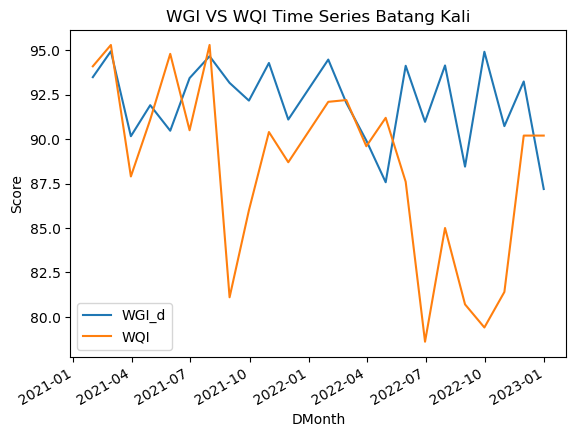

<AxesSubplot:xlabel='DMonth'>

Text(0.5, 1.0, 'WGI VS WQI Time Series Kuala Kubu Bharu')

Text(0, 0.5, 'Score')

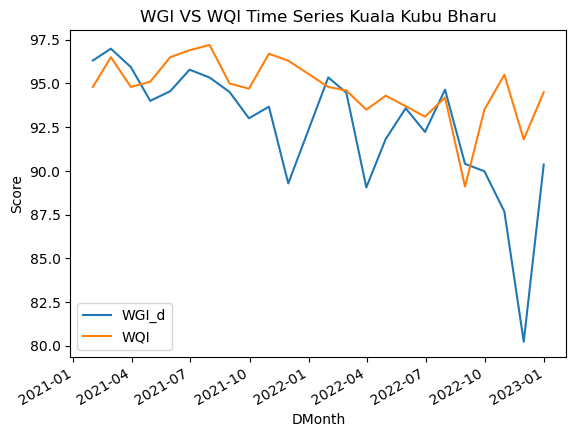

<AxesSubplot:xlabel='DMonth'>

Text(0.5, 1.0, 'WGI VS WQI Time Series Rantau Panjang New')

Text(0, 0.5, 'Score')

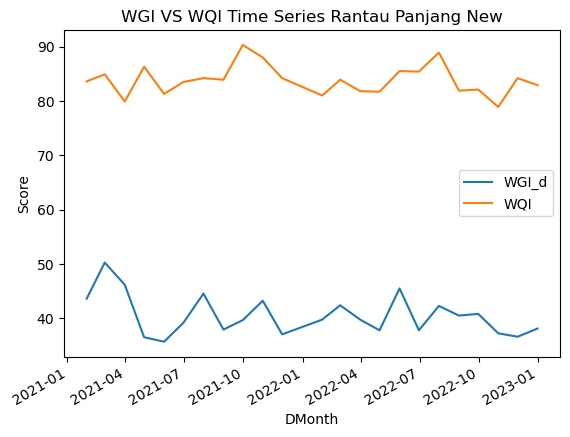

<AxesSubplot:xlabel='DMonth'>

Text(0.5, 1.0, 'WGI VS WQI Time Series Rantau Panjang Old')

Text(0, 0.5, 'Score')

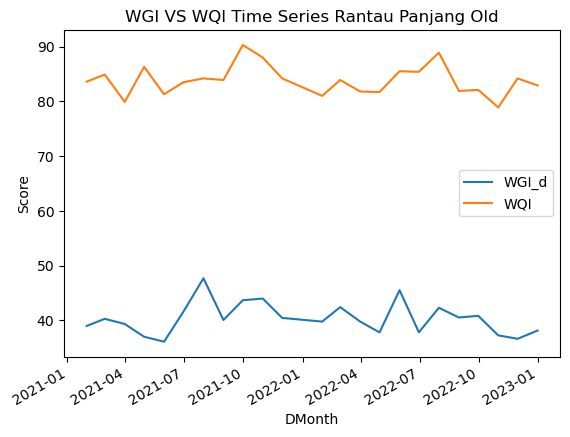

<AxesSubplot:xlabel='DMonth'>

Text(0.5, 1.0, 'WGI VS WQI Time Series Rasa')

Text(0, 0.5, 'Score')

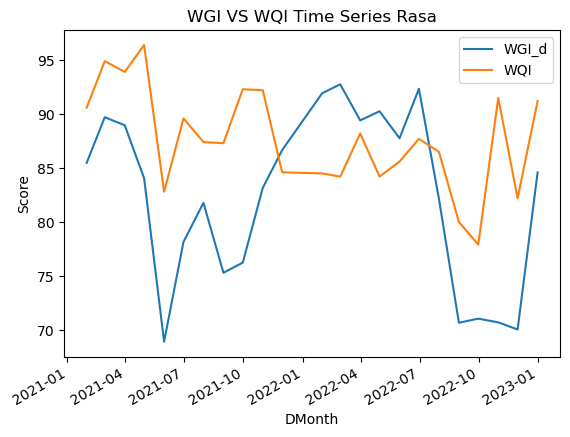

<AxesSubplot:xlabel='DMonth'>

Text(0.5, 1.0, 'WGI VS WQI Time Series Sungai Rangkap')

Text(0, 0.5, 'Score')

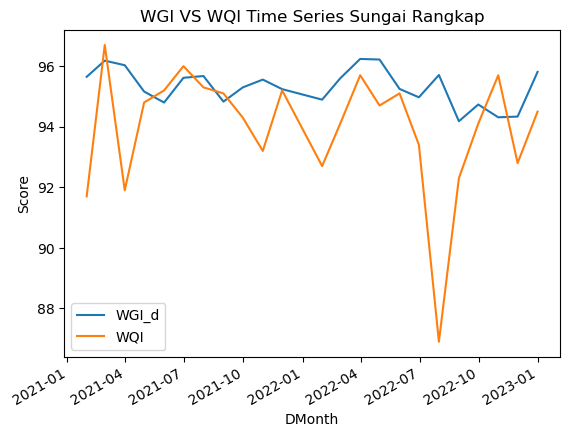

<AxesSubplot:xlabel='DMonth'>

Text(0.5, 1.0, 'WGI VS WQI Time Series Sungai Selangor Fasa 1')

Text(0, 0.5, 'Score')

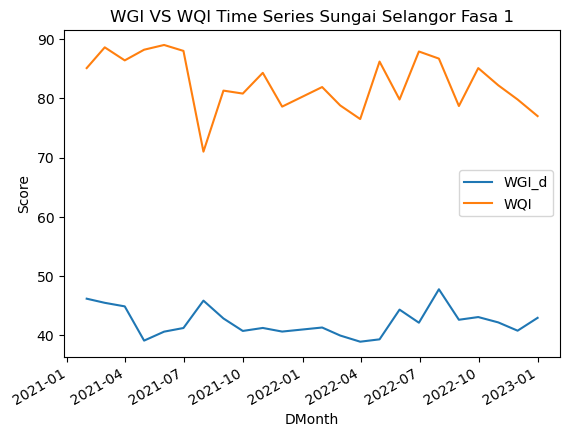

<AxesSubplot:xlabel='DMonth'>

Text(0.5, 1.0, 'WGI VS WQI Time Series Sungai Selangor Fasa 2 Stream C')

Text(0, 0.5, 'Score')

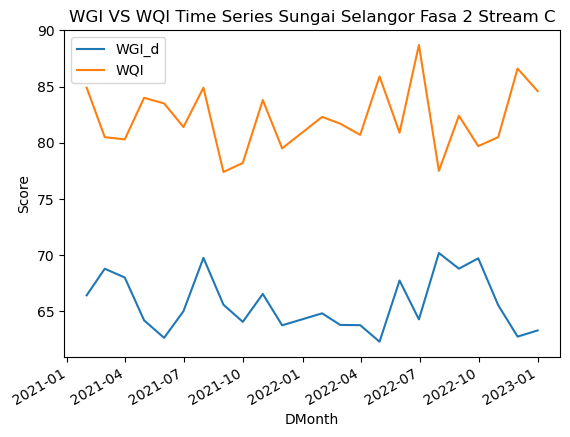

<AxesSubplot:xlabel='DMonth'>

Text(0.5, 1.0, 'WGI VS WQI Time Series Sungai Selangor Fasa 3')

Text(0, 0.5, 'Score')

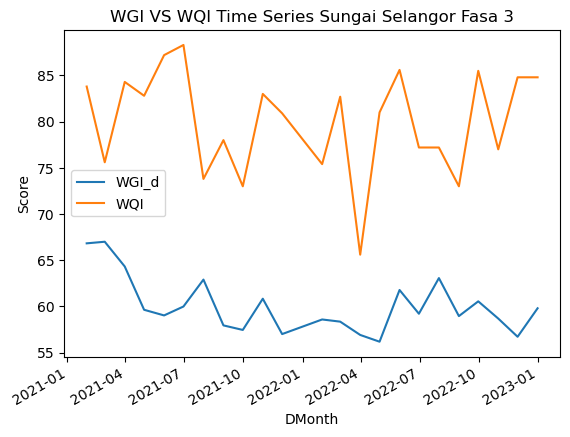

In [51]:
## General Plot to see how the WQI & WGI Differences
for i in c[c['Lembangan'] == 'Sg Selangor']['wtp'].unique():
    c[c['wtp']==i].plot(x='DMonth',y=['WGI_d','WQI'])
    plt.title(f'WGI VS WQI Time Series {i}')
    plt.ylabel('Score')
    plt.show()

### WGI/WQI VS Actual Monthly Chemical Consumption (Linear Correlation)

In [52]:
## Loading Chemical File & Perform Data Regrouping
chedf = pd.read_csv('checons.csv')
chedf = chedf.rename(columns={'Flopam AH 912 PWG (25kg / bag).1':'Flopam AH 912 PWG (25kg / bag)'})
mdict = dict(zip(chedf['Month'].unique(),np.array(range(1,13,1))))
chedf['Month'] = chedf['Month'].apply(lambda x: mdict.get(x))
cgr = pd.read_csv("C.Grouping.csv")
cgr = cgr.rename(columns={'Chemical Name':'Chem'})

In [53]:
newdb = pd.merge(pd.DataFrame({'Chem':chedf.columns}),cgr,on='Chem',how='inner')
coa = newdb[newdb['Correct Grouping']=='Coagulant']['Chem'].unique()
pha = newdb[newdb['Correct Grouping']=='pH Adjuster']['Chem'].unique()
dis = newdb[newdb['Correct Grouping']=='Disinfectant']['Chem'].unique()

In [54]:
chedf['Coagulant'] = chedf[coa].sum(axis=1)
chedf['pH Adjuster'] = chedf[pha].sum(axis=1)
chedf['Disinfectant'] = chedf[dis].sum(axis=1)

### Using 2022 & 2021 data

In [102]:
#Read the 2022 Chem Data


jam7 = pd.read_csv('CP_data\ChemPare_SgSel_2021_OLD_2022.csv', index_col=None, header=0)
jam7 = jam7.drop('Unnamed: 0', axis=1)

chem = [
        'Soda_Ash',
        'Liquid_Chlorine',
        'Liquid_Polyaluminium_Chloride',
        'Hydrated_Lime',
        'Aluminium_Sulphate']

wtp_exclude_lst = ['Bernam River Headworks (Old)',
 'Bukit Tampoi New',
 'Salak Tinggi',
 'Sungai Serai',
 'Bernam River Headworks (New)']

jam8 = jam7.copy().fillna(0)

for i in wtp_exclude_lst:
    jam8 = jam8[(jam8['wtp'] != i) ]

jam8['Soda_Ash'] = jam8.apply(lambda row: row['Soda_Ash_T'] + row['Soda Ash'], axis=1)
jam8['Liquid_Chlorine'] = jam8.apply(lambda row: row['Liquid_Chlorine_T'] + row['Liquid Chlorine'], axis=1)
jam8['Liquid_Polyaluminium_Chloride'] = jam8.apply(lambda row: row['Liquid Polyaluminium Chloride (mg/L)'] + row['Liquid Polyaluminium Chloride'], axis=1)
jam8['Hydrated_Lime'] = jam8.apply(lambda row: row['Hydrated Lime'] + row['Hydrated_Lime_Pow_T'], axis=1)
jam8['Aluminium_Sulphate'] = jam8.apply(lambda row: row['Liquid Aluminium Sulphate'] + row['Kibbled Aluminium Sulphate'], axis=1)
jam8['Sodium_Silico_Fluoride'] = jam8.apply(lambda row: row['Sodium Silico Fluoride'] + row['Sodium Silico Fluoride (mg/L)'], axis=1)

jam8 = jam8.drop(['Sodium Aluminosilicate','Flopam FA 920 PWG','Raw Water Polyelectrolyte 4290 PWG / 4190 PWG / AN910 (mg/L)','Flopam FO 4290 PWG','Sodium_Silico_Fluoride','Microsand','Sodium Silico Fluoride (mg/L)','Sodium Silico Fluoride','Kibbled Aluminium Sulphate','Liquid Aluminium Sulphate','Hydrated Lime','Hydrated_Lime_Pow_T','Soda_Ash_T','Soda Ash','Liquid_Chlorine_T','Liquid Chlorine','Liquid Polyaluminium Chloride (mg/L)','Liquid Polyaluminium Chloride'],axis = 1)

# #jam8 = jam8[jam8['Date'] < '2022-01-01']
# #Columns to check for outliers
# columns_to_check = [
#     'pH_avg', 'Turbidity_avg', 'Color_avg', 'Iron_avg',
#     'Ammonia_avg', 'Manganese_avg', 'Soda_Ash', 'Liquid_Chlorine',
#     'Liquid_Polyaluminium_Chloride', 'Hydrated_Lime', 'Aluminium_Sulphate'
# ]

# def remove_outliers(df, group_col, value_col):
#     Q1 = df.groupby(group_col)[value_col].quantile(0.25)
#     Q3 = df.groupby(group_col)[value_col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     return df[df.apply(lambda row: lower_bound[row[group_col]] <= row[value_col] <= upper_bound[row[group_col]], axis=1)]
# # Apply the remove_outliers function for each column and update the DataFrame
# for column in columns_to_check:
#     jam8 = remove_outliers(jam8, 'wtp', column)

In [103]:
to_score['Date'] = pd.to_datetime(to_score['Date'])
jam8['Date'] = pd.to_datetime(jam8['Date'])
jam8['Month'] = jam8['Date'].dt.strftime('%m-%Y')
fcl = ['Month', 'wtp', 'Soda_Ash',	'Liquid_Chlorine',	'Liquid_Polyaluminium_Chloride',	'Hydrated_Lime',	'Aluminium_Sulphate',]
sum_jam8 = jam8.groupby(['wtp','Month'])['Soda_Ash','Liquid_Chlorine','Liquid_Polyaluminium_Chloride','Hydrated_Lime','Aluminium_Sulphate'].sum().reset_index()
db1 = sum_jam8[fcl].copy()
c2 = pd.merge(c[c['Lembangan']== 'Sg Selangor'],db1,on=['wtp','Month'],how='left')

In [104]:
f= pd.merge(jam8[['wtp','Date', 'Soda_Ash', 'Liquid_Chlorine', 'Liquid_Polyaluminium_Chloride', 'Hydrated_Lime', 'Aluminium_Sulphate']],to_score,on = ['wtp','Date'],how = 'left')

In [105]:
c[c['wtp'] == 'Sungai Selangor Fasa 2 Stream C'][['Lembangan','Month']]

       Lembangan    Month
656  Sg Selangor  01-2021
657  Sg Selangor  01-2022
658  Sg Selangor  02-2021
659  Sg Selangor  02-2022
660  Sg Selangor  03-2021
661  Sg Selangor  03-2022
662  Sg Selangor  04-2021
663  Sg Selangor  04-2022
664  Sg Selangor  05-2021
665  Sg Selangor  05-2022
666  Sg Selangor  06-2021
667  Sg Selangor  06-2022
668  Sg Selangor  07-2021
669  Sg Selangor  07-2022
670  Sg Selangor  08-2021
671  Sg Selangor  08-2022
672  Sg Selangor  09-2021
673  Sg Selangor  09-2022
674  Sg Selangor  10-2021
675  Sg Selangor  10-2022
676  Sg Selangor  11-2021
677  Sg Selangor  11-2022
678  Sg Selangor  12-2022

In [106]:
c2['all_chem'] = c2['Soda_Ash'] +c2['Liquid_Chlorine'] + c2['Liquid_Polyaluminium_Chloride'] +	c2['Hydrated_Lime'] +c2['Aluminium_Sulphate']

In [107]:
## General Correlation Between Chemical Products & WGI/WQI
out_corr_pd = pd.DataFrame()
onew = 0
for i in c2['wtp'].unique():
    x = c2[c2['wtp']== i][['wtp','WQI','WGI_d','all_chem','Soda_Ash',	'Liquid_Chlorine',	'Liquid_Polyaluminium_Chloride',	'Hydrated_Lime',	'Aluminium_Sulphate']].corr()
    x['wtp'] = [i,i,i,i,i,i,i,i]
    if onew == 0:
        out_corr_pd.append(x)
    else:
        out_corr_pd = pd.concat([out_corr_pd,x], ignore_index=False)
    onew = onew + 1




                                    WQI     WGI_d  all_chem  Soda_Ash  \
WQI                            1.000000  0.133500 -0.502820 -0.417391   
WGI_d                          0.133500  1.000000 -0.489353 -0.464088   
all_chem                      -0.502820 -0.489353  1.000000  0.785119   
Soda_Ash                      -0.417391 -0.464088  0.785119  1.000000   
Liquid_Chlorine               -0.263599 -0.233964  0.621605  0.638276   
Liquid_Polyaluminium_Chloride       NaN       NaN       NaN       NaN   
Hydrated_Lime                       NaN       NaN       NaN       NaN   
Aluminium_Sulphate            -0.465436 -0.434467  0.917181  0.511616   

                               Liquid_Chlorine  Liquid_Polyaluminium_Chloride  \
WQI                                  -0.263599                            NaN   
WGI_d                                -0.233964                            NaN   
all_chem                              0.621605                            NaN   
Soda_Ash          

In [108]:
out_corr_pd.to_csv('Plot/Result/WGI_WQI_Chem_Corr_6.csv')

In [109]:
chem = ['Soda_Ash',
 'Liquid_Chlorine',
 'Liquid_Polyaluminium_Chloride',
 'Hydrated_Lime',
 'Aluminium_Sulphate',
 'all_chem']

In [110]:
c2['Month'] = pd.to_datetime(c2['Month'], format='%m-%Y')
c2 = c2[(c2['Month'] >= '1-2022') ]

               WQI     WGI_d  all_chem
WQI       1.000000 -0.079954 -0.078068
WGI_d    -0.079954  1.000000 -0.275763
all_chem -0.078068 -0.275763  1.000000


<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Total Chemical Dosage Time Series Batang Kali Corr WGI:-0.28')

Text(0, 0.5, 'Score')

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Total Chemical Dosage Time Series Batang Kali Corr WQI:-0.08')

Text(0, 0.5, 'Score')

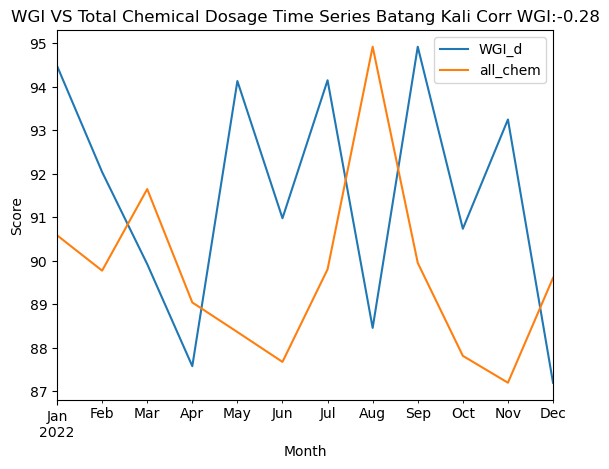

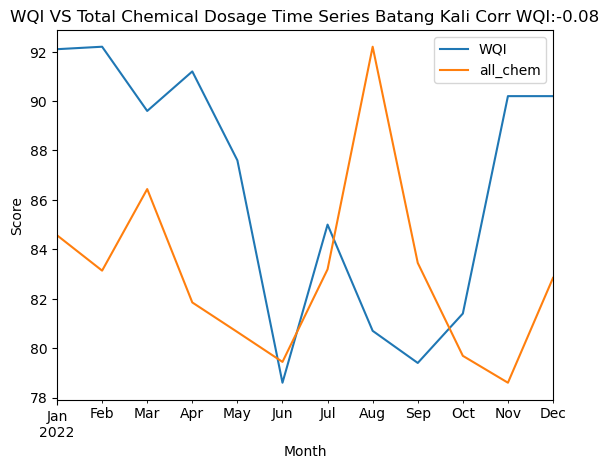

<AxesSubplot:>

Text(0.5, 1.0, 'Batang Kali')

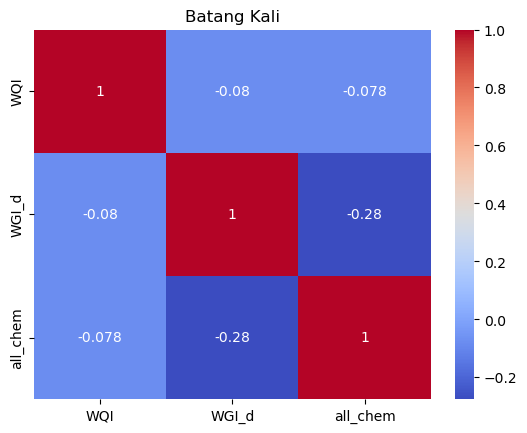

               WQI     WGI_d  all_chem
WQI       1.000000  0.346624 -0.413433
WGI_d     0.346624  1.000000 -0.519281
all_chem -0.413433 -0.519281  1.000000


<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Total Chemical Dosage Time Series Kuala Kubu Bharu Corr WGI:-0.52')

Text(0, 0.5, 'Score')

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Total Chemical Dosage Time Series Kuala Kubu Bharu Corr WQI:-0.41')

Text(0, 0.5, 'Score')

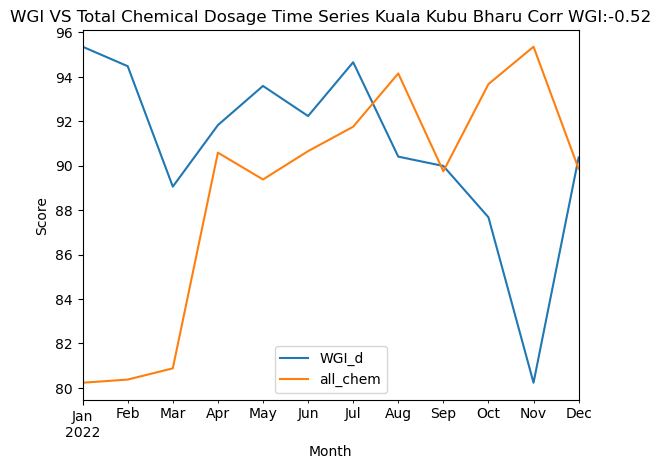

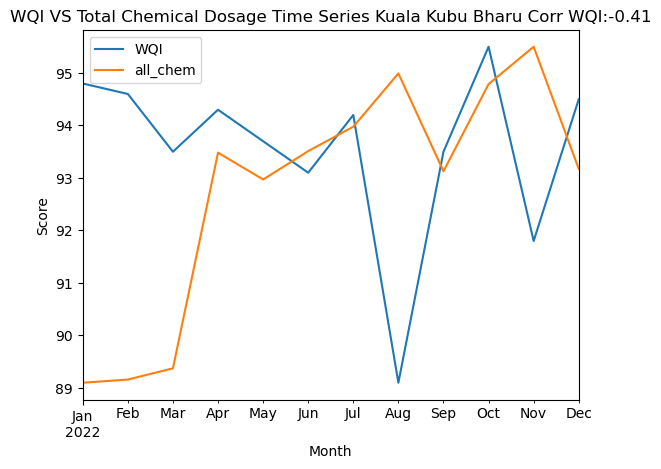

<AxesSubplot:>

Text(0.5, 1.0, 'Kuala Kubu Bharu')

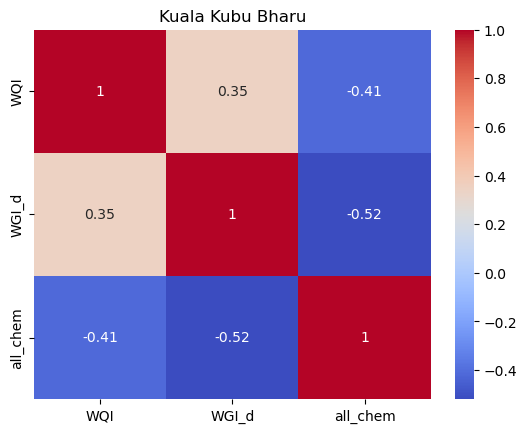

               WQI     WGI_d  all_chem
WQI       1.000000  0.458427 -0.558775
WGI_d     0.458427  1.000000 -0.080511
all_chem -0.558775 -0.080511  1.000000


<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Total Chemical Dosage Time Series Rantau Panjang New Corr WGI:-0.08')

Text(0, 0.5, 'Score')

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Total Chemical Dosage Time Series Rantau Panjang New Corr WQI:-0.56')

Text(0, 0.5, 'Score')

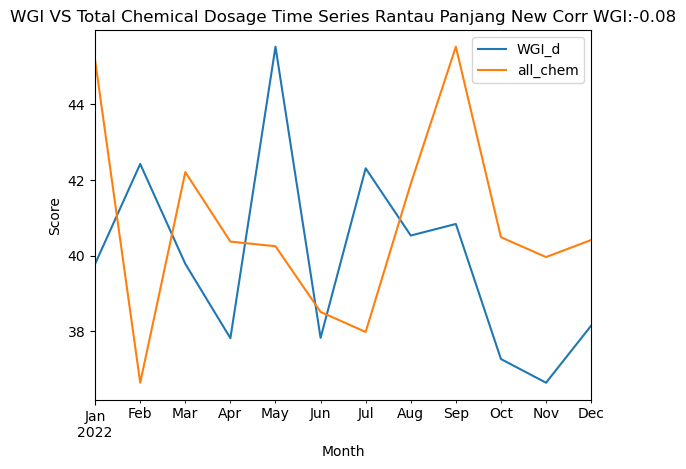

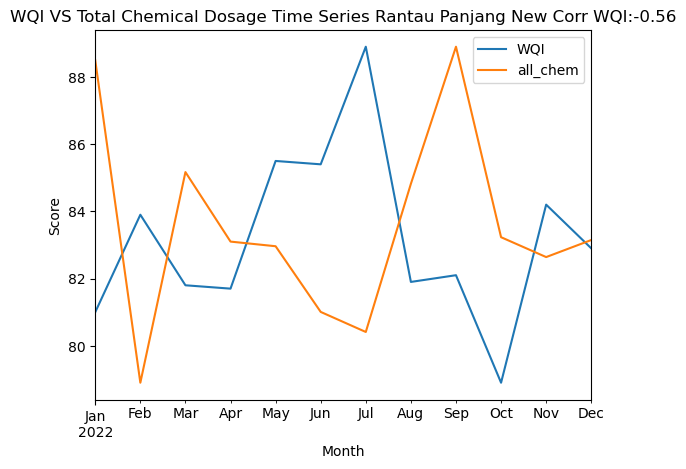

<AxesSubplot:>

Text(0.5, 1.0, 'Rantau Panjang New')

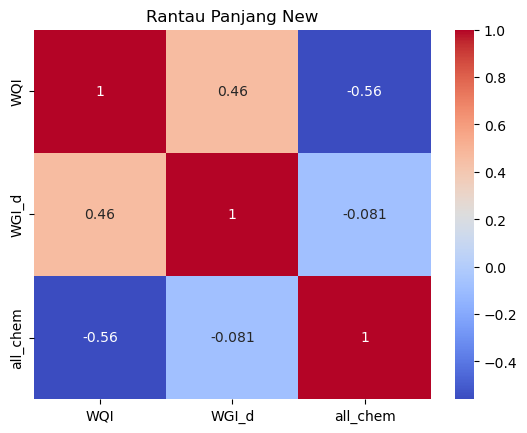

               WQI     WGI_d  all_chem
WQI       1.000000  0.458427  0.356931
WGI_d     0.458427  1.000000  0.197230
all_chem  0.356931  0.197230  1.000000


<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Total Chemical Dosage Time Series Rantau Panjang Old Corr WGI:0.2')

Text(0, 0.5, 'Score')

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Total Chemical Dosage Time Series Rantau Panjang Old Corr WQI:0.36')

Text(0, 0.5, 'Score')

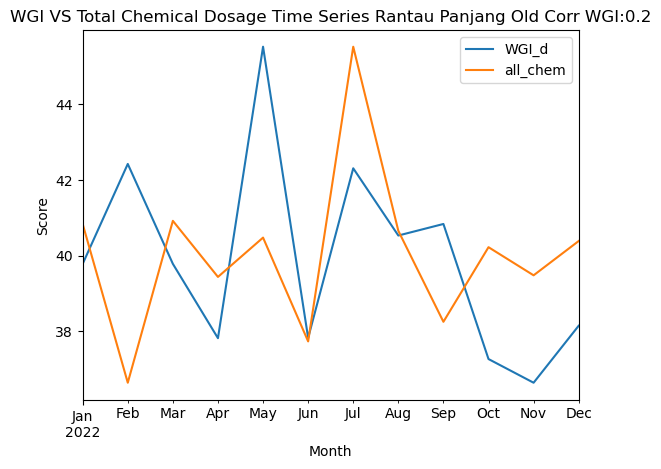

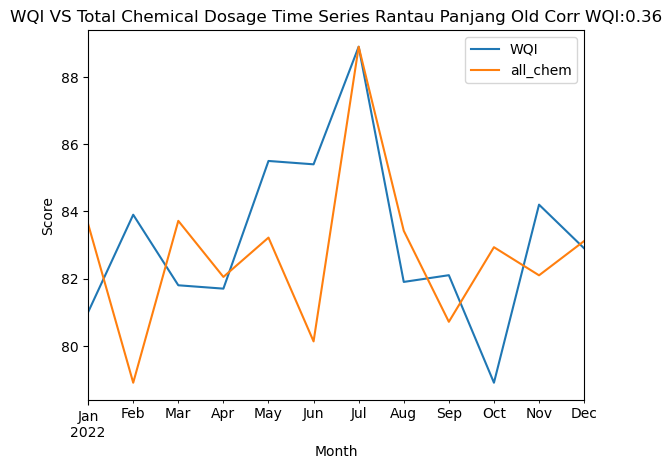

<AxesSubplot:>

Text(0.5, 1.0, 'Rantau Panjang Old')

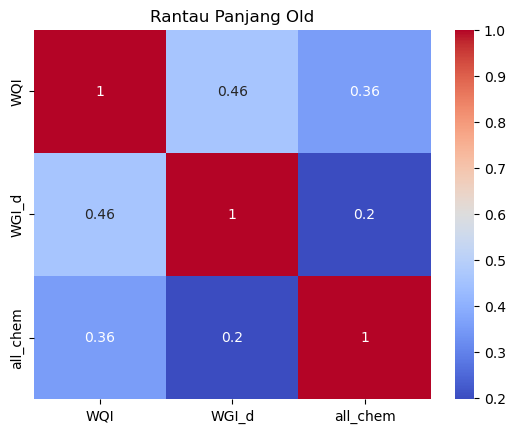

               WQI     WGI_d  all_chem
WQI       1.000000  0.333164       NaN
WGI_d     0.333164  1.000000       NaN
all_chem       NaN       NaN       NaN


<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Total Chemical Dosage Time Series Rasa Corr WGI:nan')

Text(0, 0.5, 'Score')

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Total Chemical Dosage Time Series Rasa Corr WQI:nan')

Text(0, 0.5, 'Score')

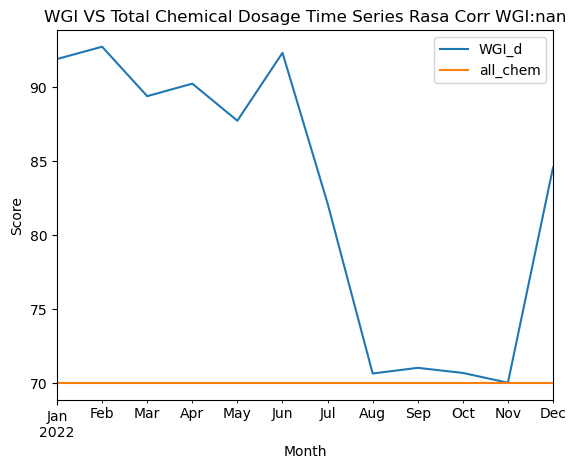

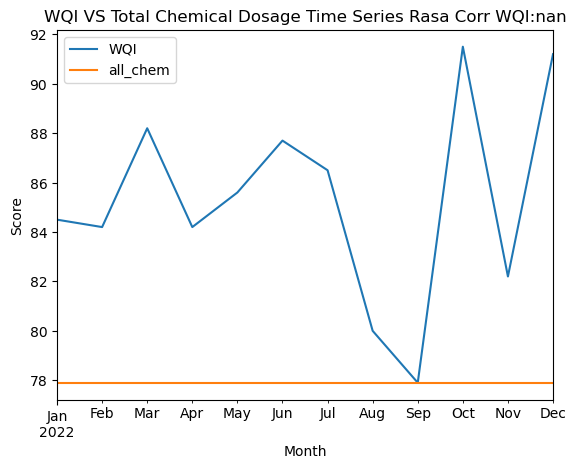

<AxesSubplot:>

Text(0.5, 1.0, 'Rasa')

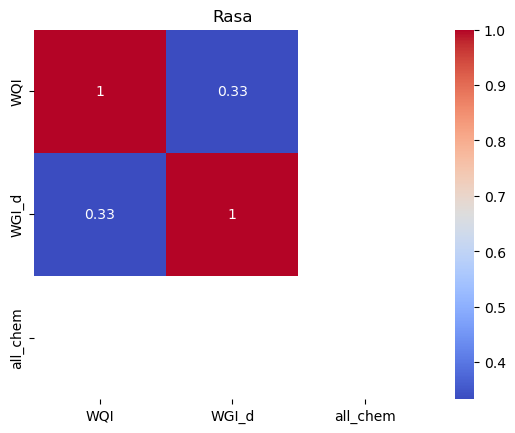

               WQI     WGI_d  all_chem
WQI       1.000000  0.049872  0.227133
WGI_d     0.049872  1.000000  0.068178
all_chem  0.227133  0.068178  1.000000


<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Total Chemical Dosage Time Series Sungai Rangkap Corr WGI:0.07')

Text(0, 0.5, 'Score')

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Total Chemical Dosage Time Series Sungai Rangkap Corr WQI:0.23')

Text(0, 0.5, 'Score')

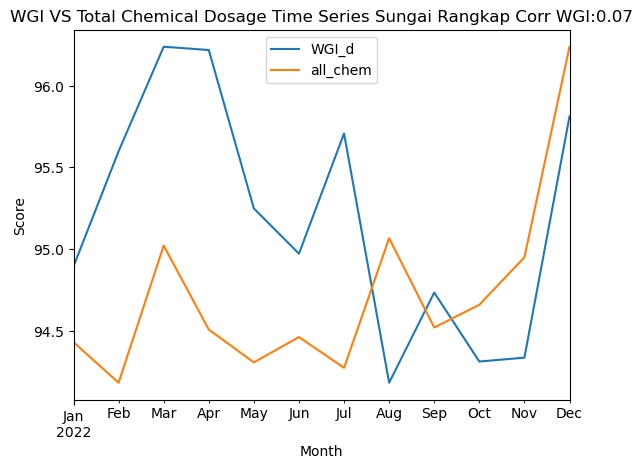

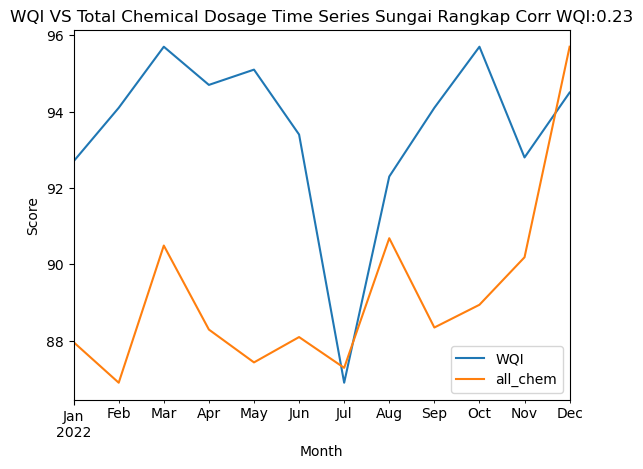

<AxesSubplot:>

Text(0.5, 1.0, 'Sungai Rangkap')

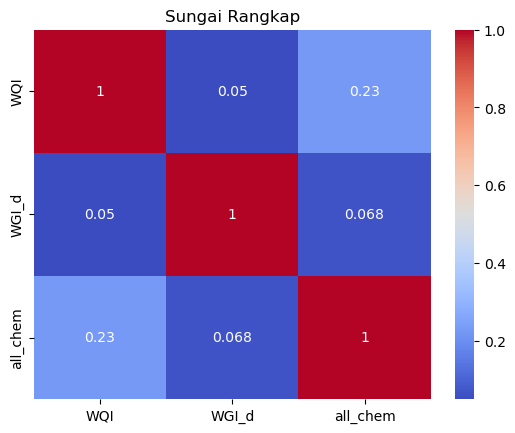

               WQI     WGI_d  all_chem
WQI       1.000000  0.333175       NaN
WGI_d     0.333175  1.000000       NaN
all_chem       NaN       NaN       NaN


<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Total Chemical Dosage Time Series Sungai Selangor Fasa 1 Corr WGI:nan')

Text(0, 0.5, 'Score')

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Total Chemical Dosage Time Series Sungai Selangor Fasa 1 Corr WQI:nan')

Text(0, 0.5, 'Score')

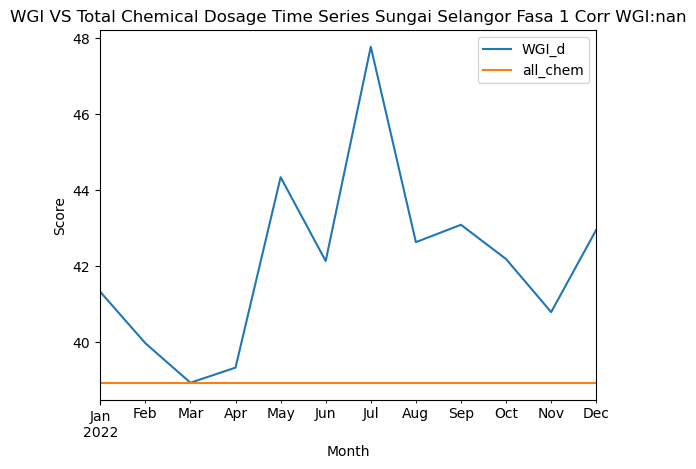

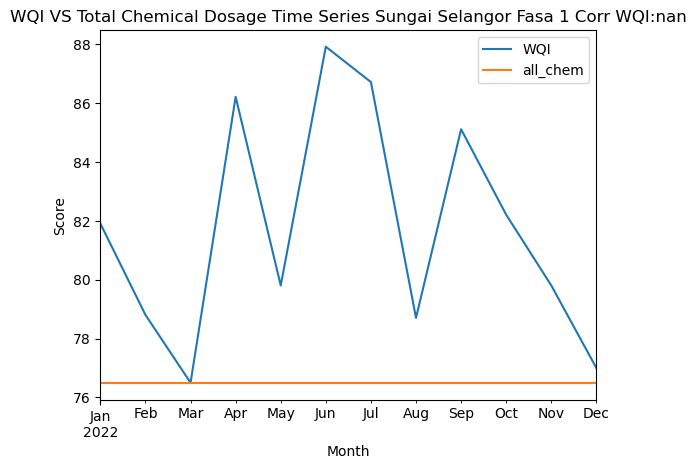

<AxesSubplot:>

Text(0.5, 1.0, 'Sungai Selangor Fasa 1')

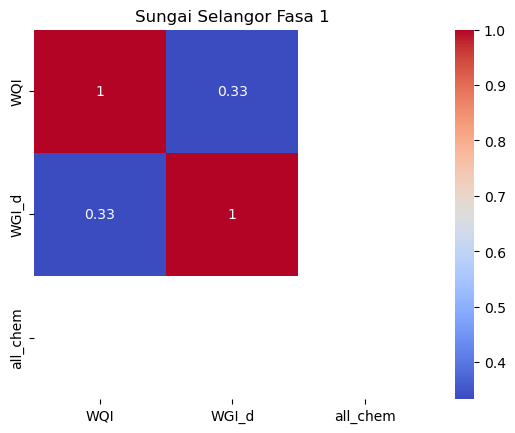

               WQI     WGI_d  all_chem
WQI       1.000000 -0.696108  0.135478
WGI_d    -0.696108  1.000000 -0.219441
all_chem  0.135478 -0.219441  1.000000


<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Total Chemical Dosage Time Series Sungai Selangor Fasa 2 Stream C Corr WGI:-0.22')

Text(0, 0.5, 'Score')

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Total Chemical Dosage Time Series Sungai Selangor Fasa 2 Stream C Corr WQI:0.14')

Text(0, 0.5, 'Score')

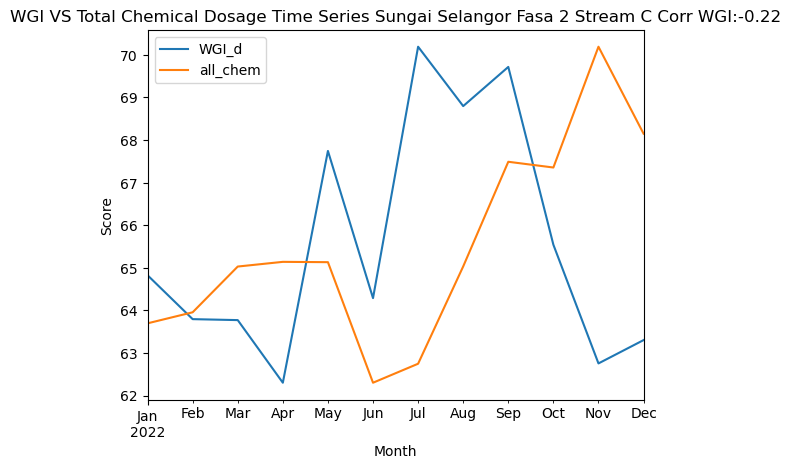

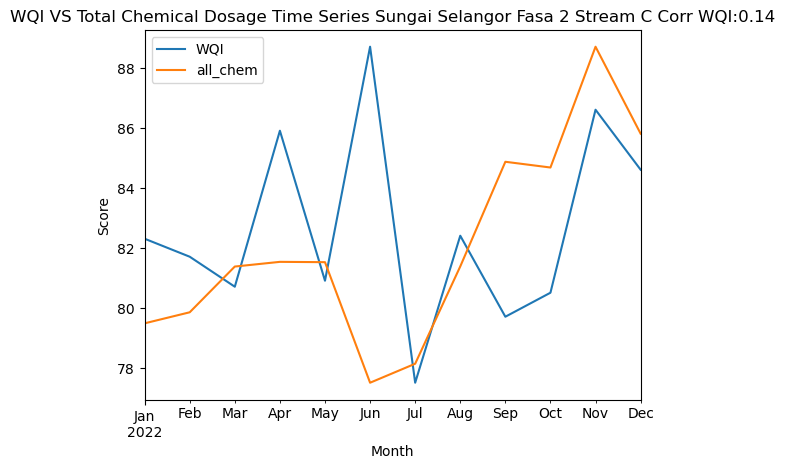

<AxesSubplot:>

Text(0.5, 1.0, 'Sungai Selangor Fasa 2 Stream C')

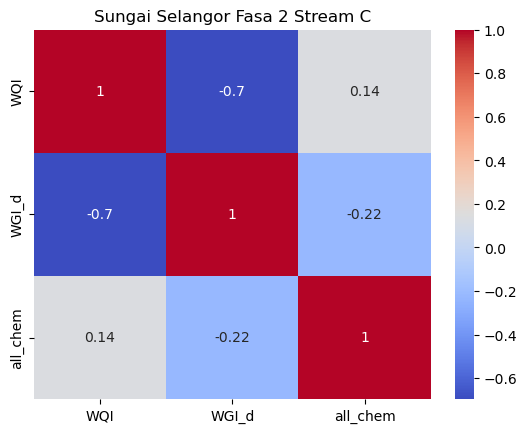

               WQI     WGI_d  all_chem
WQI       1.000000  0.251294       NaN
WGI_d     0.251294  1.000000       NaN
all_chem       NaN       NaN       NaN


<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Total Chemical Dosage Time Series Sungai Selangor Fasa 3 Corr WGI:nan')

Text(0, 0.5, 'Score')

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Total Chemical Dosage Time Series Sungai Selangor Fasa 3 Corr WQI:nan')

Text(0, 0.5, 'Score')

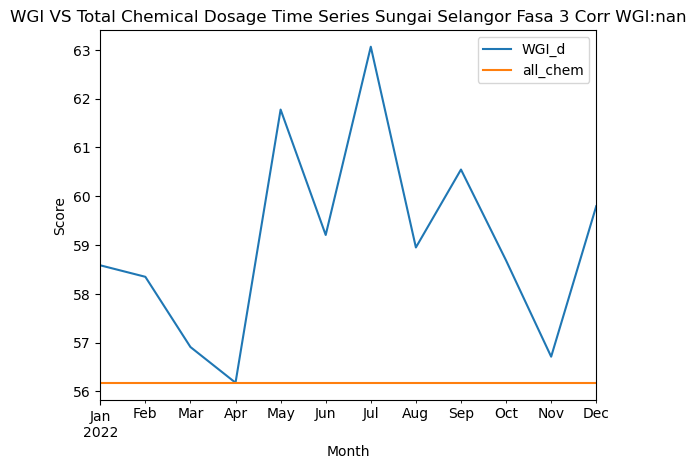

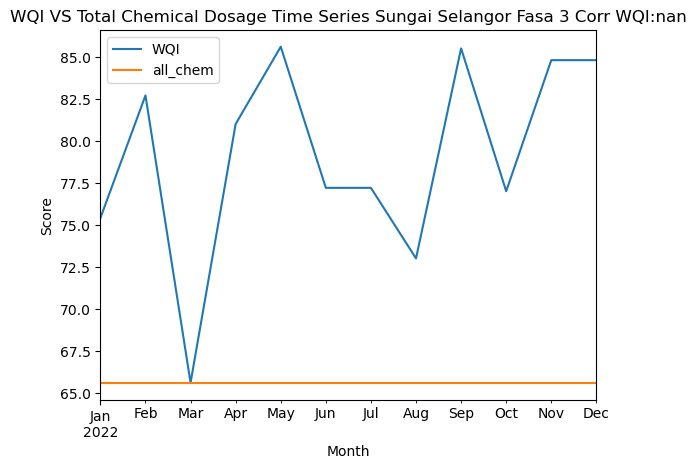

<AxesSubplot:>

Text(0.5, 1.0, 'Sungai Selangor Fasa 3')

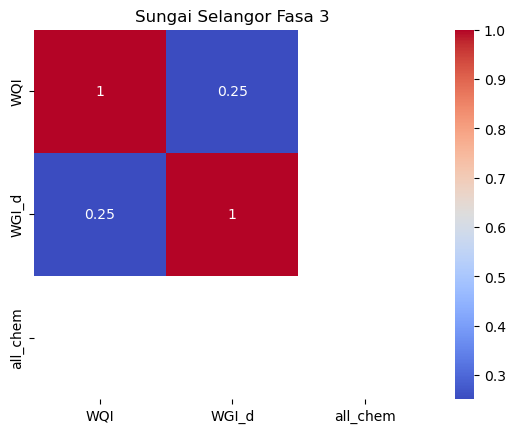

In [111]:

columns_target = 'wtp'
core_unit_wgi = []
core_unit_wqi = []
wtp_corr = []
columns_target = 'wtp'

for i in c2[columns_target].unique():
    for j in ['all_chem']:
     
        core = c2[c2[columns_target] == i][['WQI','WGI_d',j]].corr()
        core_unit_wgi.append(core[j][1])
        corr_val =round(core[j][1],2)
        corr_val_WQI =round(core[j][0],2)
        core_unit_wqi.append(core[j][0])
        print(core)
      
        a = c2[c2['wtp']==i].copy()
        scaler = MinMaxScaler(feature_range=(a['WGI_d'].min(), a['WGI_d'].max()))
        a[j] = scaler.fit_transform(a[[j]])
        #a['WQI'] = scaler.fit_transform(a[['WQI']])
        a.plot(x='Month',y=['WGI_d',j])
        plt.title(f'WGI VS Total Chemical Dosage Time Series {i} Corr WGI:{corr_val}')
        plt.ylabel('Score')
        scaler2 = MinMaxScaler(feature_range=(a['WQI'].min(), a['WQI'].max()))
        a[j] = scaler2.fit_transform(a[[j]])
        a.plot(x='Month',y=['WQI',j])
        plt.title(f'WQI VS Total Chemical Dosage Time Series {i} Corr WQI:{corr_val_WQI}')
        plt.ylabel('Score')
      
      
        plt.show()
        wtp_corr.append(i) 
        sns.heatmap(core, annot=True, cmap='coolwarm')
        plt.title(i)
        plt.show()

data = {'wtp': wtp_corr,
        'corr_wgi_unit': core_unit_wgi,
        'corr_wqi_unit': core_unit_wqi}
  
# Create DataFrame
corr_df = pd.DataFrame(data)

In [112]:
print(corr_df.sort_values('corr_wgi_unit'))

                               wtp  corr_wgi_unit  corr_wqi_unit
1                 Kuala Kubu Bharu      -0.519281      -0.413433
0                      Batang Kali      -0.275763      -0.078068
7  Sungai Selangor Fasa 2 Stream C      -0.219441       0.135478
2               Rantau Panjang New      -0.080511      -0.558775
5                   Sungai Rangkap       0.068178       0.227133
3               Rantau Panjang Old       0.197230       0.356931
4                             Rasa            NaN            NaN
6           Sungai Selangor Fasa 1            NaN            NaN
8           Sungai Selangor Fasa 3            NaN            NaN


In [113]:
jam8.columns

Index(['wtp', 'pH_avg', 'Date', 'Turbidity_avg', 'Color_avg', 'Iron_avg',
       'Ammonia_avg', 'Manganese_avg', 'Month',
       'Liquid Chlorine (Intermediate)', 'Flopam FO 4190 PWG',
       'Polyelectrolyte AN 910 PWG', 'Soda_Ash', 'Liquid_Chlorine',
       'Liquid_Polyaluminium_Chloride', 'Hydrated_Lime', 'Aluminium_Sulphate'],
      dtype='object')

### Problem investigating

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Batang Kali, Soda_Ash ')

Text(0, 0.5, 'mg/l')

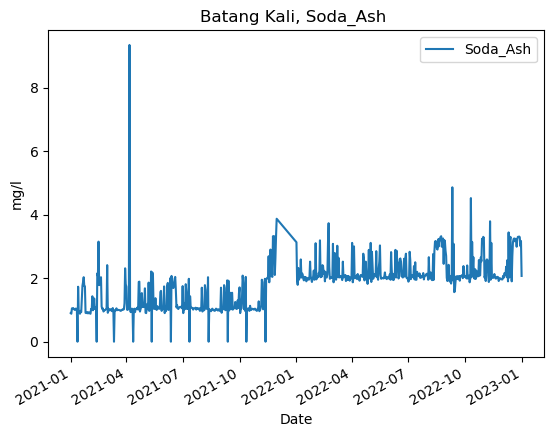

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Batang Kali, Liquid_Chlorine ')

Text(0, 0.5, 'mg/l')

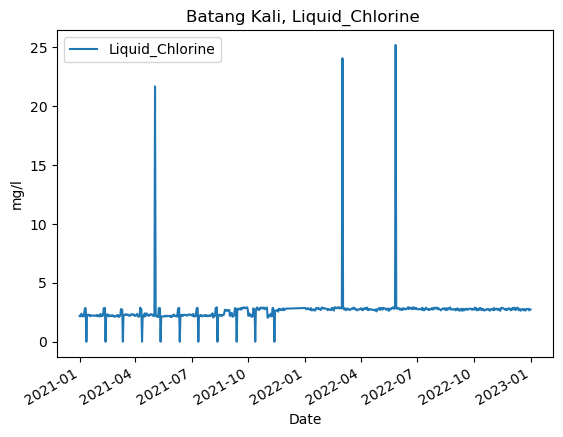

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Batang Kali, Liquid_Polyaluminium_Chloride ')

Text(0, 0.5, 'mg/l')

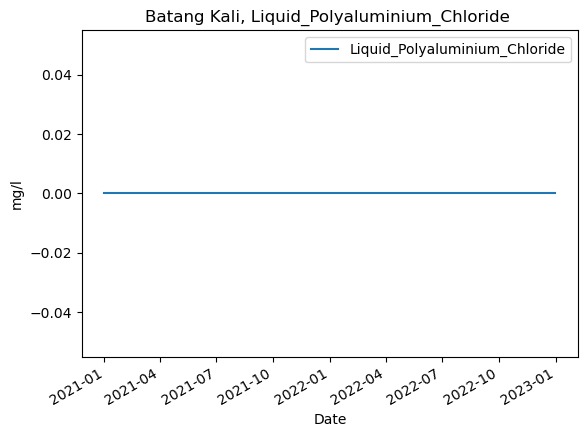

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Batang Kali, Hydrated_Lime ')

Text(0, 0.5, 'mg/l')

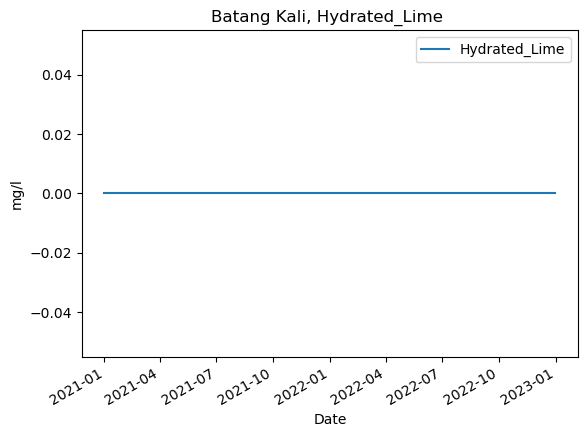

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Batang Kali, Aluminium_Sulphate ')

Text(0, 0.5, 'mg/l')

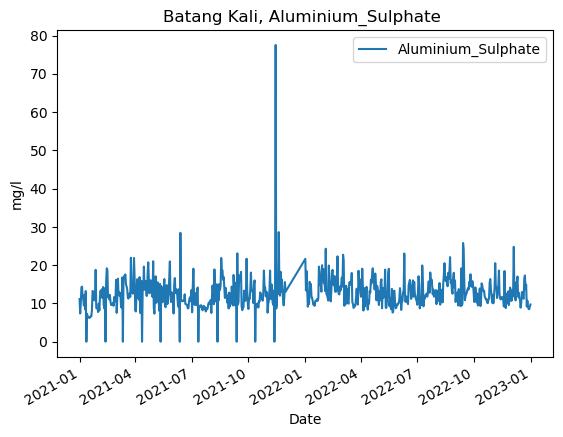

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rantau Panjang New, Soda_Ash ')

Text(0, 0.5, 'mg/l')

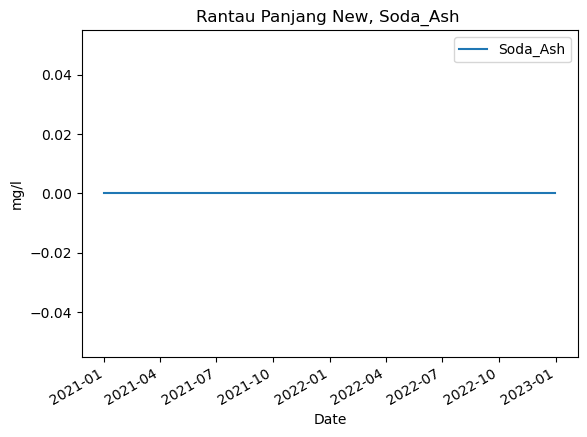

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rantau Panjang New, Liquid_Chlorine ')

Text(0, 0.5, 'mg/l')

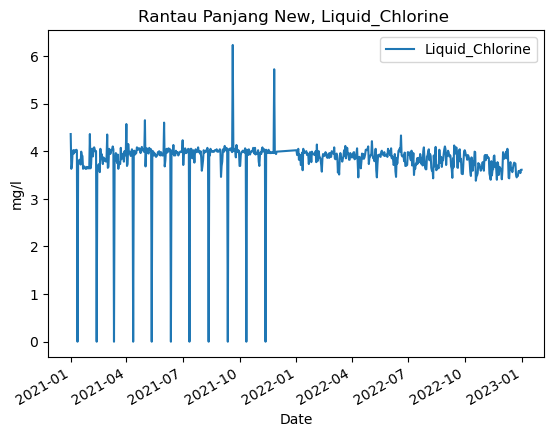

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rantau Panjang New, Liquid_Polyaluminium_Chloride ')

Text(0, 0.5, 'mg/l')

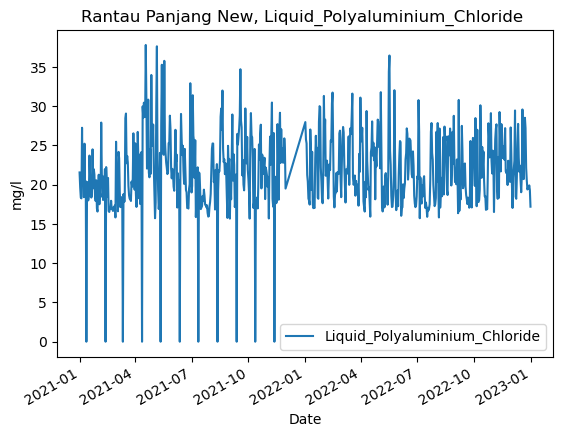

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rantau Panjang New, Hydrated_Lime ')

Text(0, 0.5, 'mg/l')

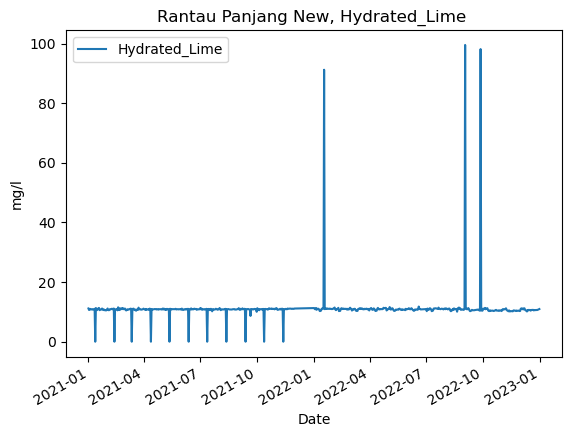

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rantau Panjang New, Aluminium_Sulphate ')

Text(0, 0.5, 'mg/l')

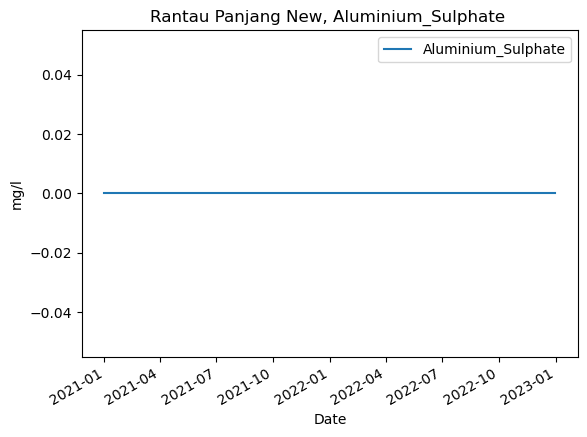

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rantau Panjang Old, Soda_Ash ')

Text(0, 0.5, 'mg/l')

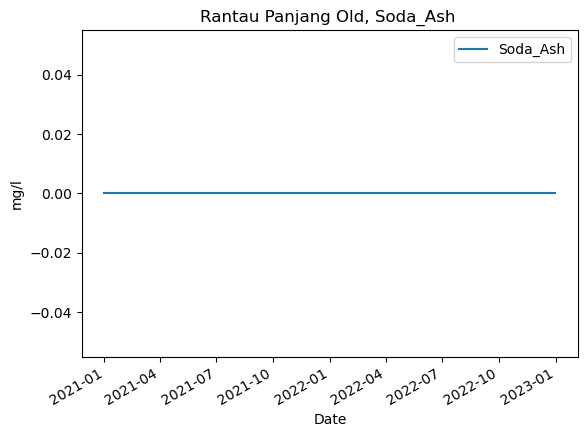

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rantau Panjang Old, Liquid_Chlorine ')

Text(0, 0.5, 'mg/l')

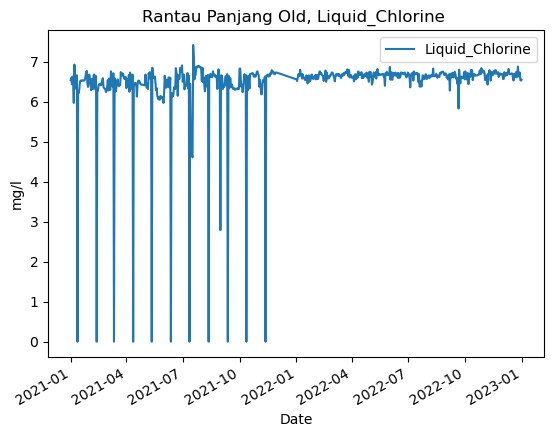

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rantau Panjang Old, Liquid_Polyaluminium_Chloride ')

Text(0, 0.5, 'mg/l')

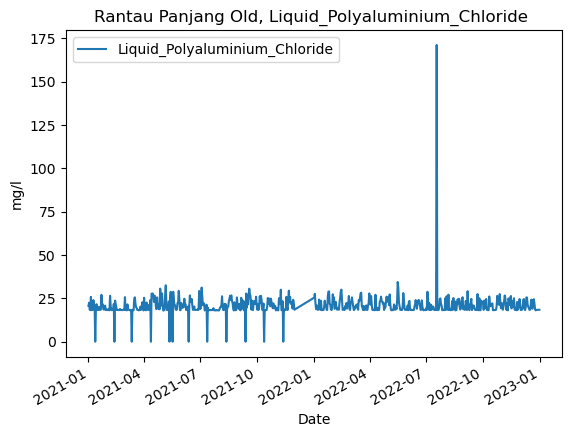

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rantau Panjang Old, Hydrated_Lime ')

Text(0, 0.5, 'mg/l')

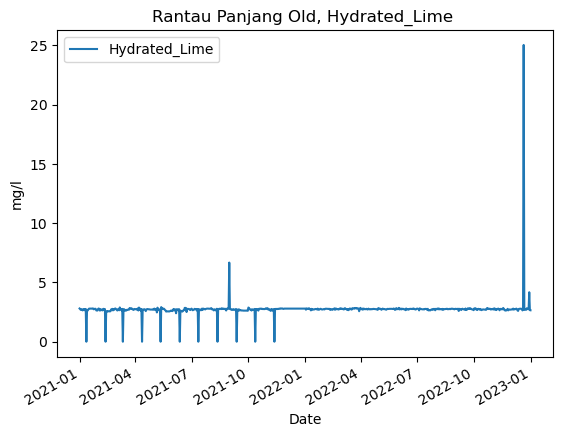

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rantau Panjang Old, Aluminium_Sulphate ')

Text(0, 0.5, 'mg/l')

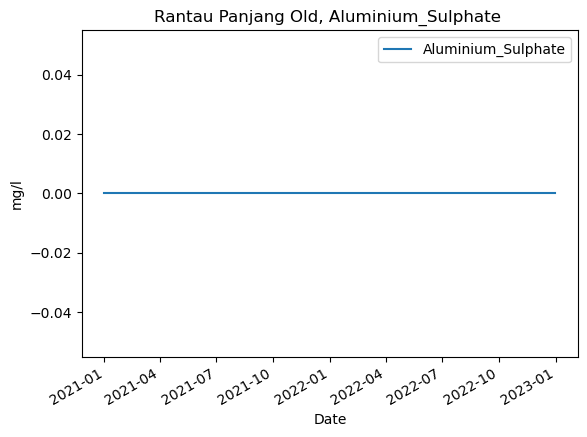

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Rangkap, Soda_Ash ')

Text(0, 0.5, 'mg/l')

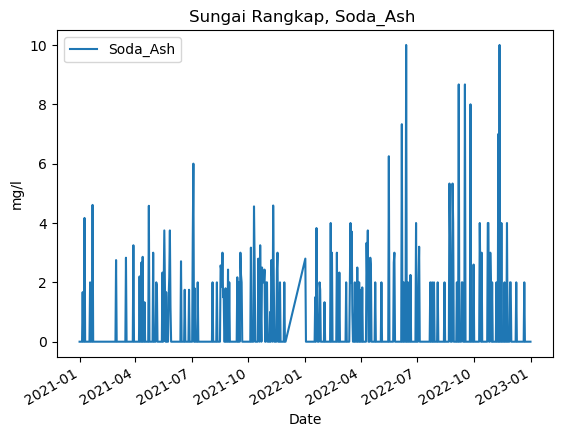

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Rangkap, Liquid_Chlorine ')

Text(0, 0.5, 'mg/l')

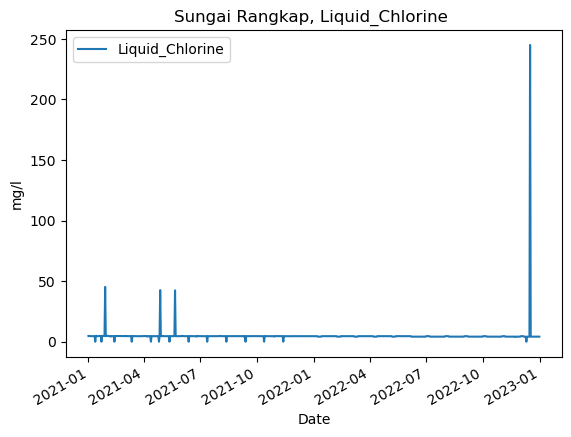

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Rangkap, Liquid_Polyaluminium_Chloride ')

Text(0, 0.5, 'mg/l')

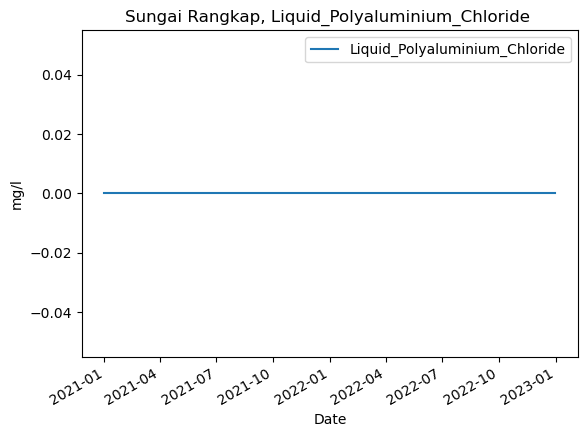

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Rangkap, Hydrated_Lime ')

Text(0, 0.5, 'mg/l')

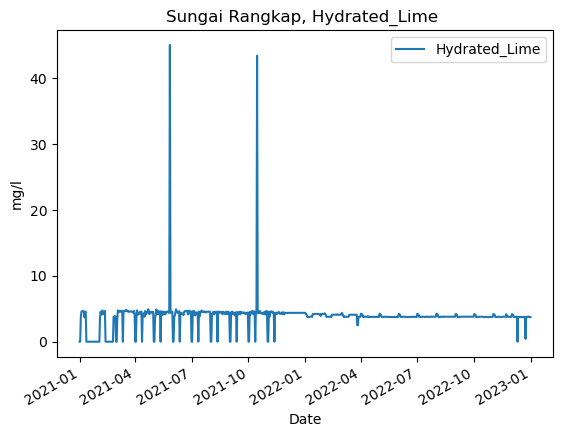

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Rangkap, Aluminium_Sulphate ')

Text(0, 0.5, 'mg/l')

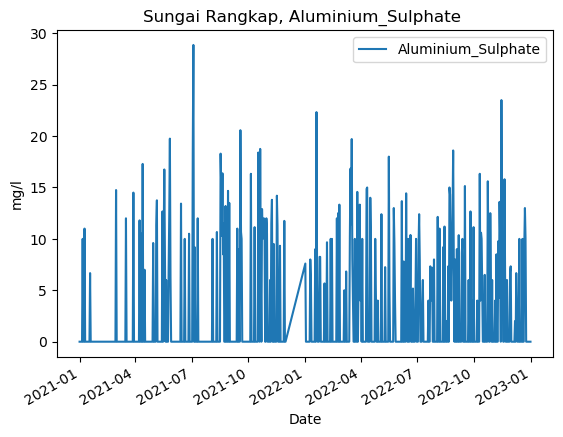

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Kuala Kubu Bharu, Soda_Ash ')

Text(0, 0.5, 'mg/l')

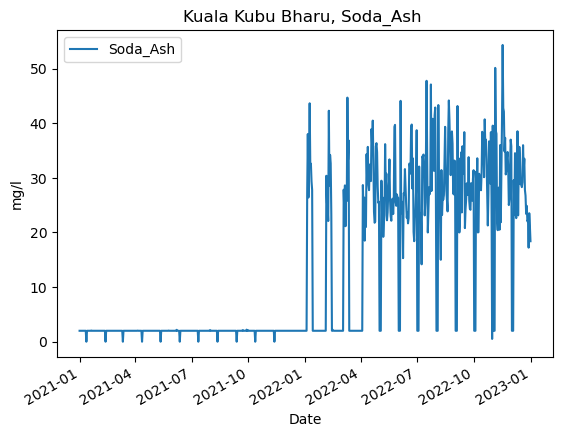

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Kuala Kubu Bharu, Liquid_Chlorine ')

Text(0, 0.5, 'mg/l')

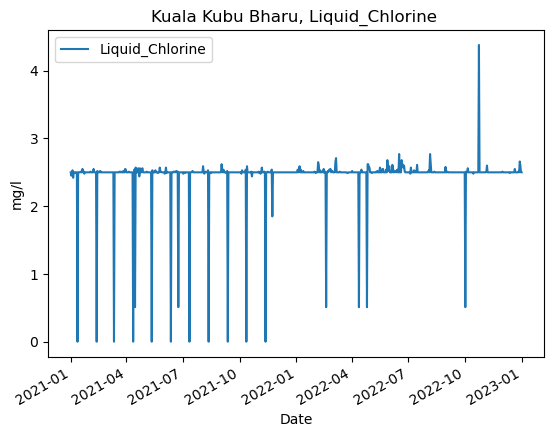

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Kuala Kubu Bharu, Liquid_Polyaluminium_Chloride ')

Text(0, 0.5, 'mg/l')

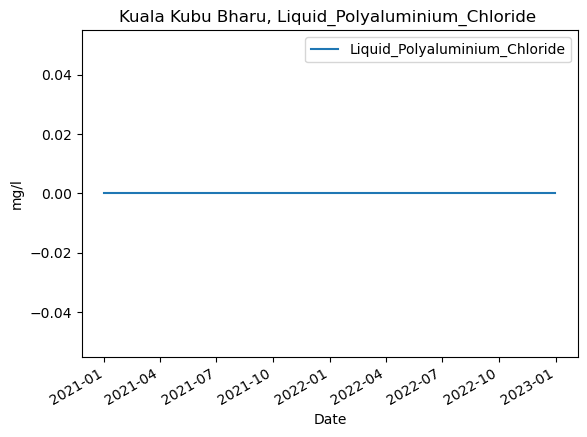

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Kuala Kubu Bharu, Hydrated_Lime ')

Text(0, 0.5, 'mg/l')

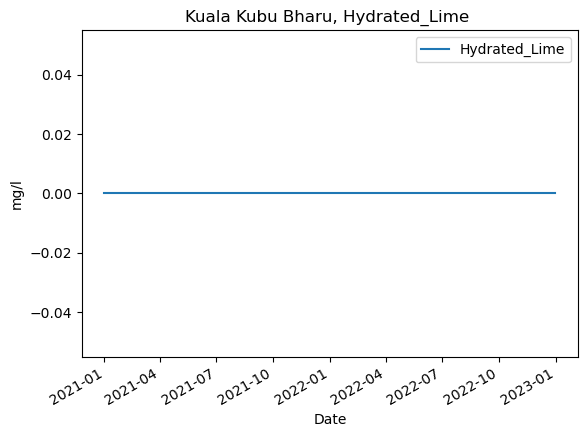

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Kuala Kubu Bharu, Aluminium_Sulphate ')

Text(0, 0.5, 'mg/l')

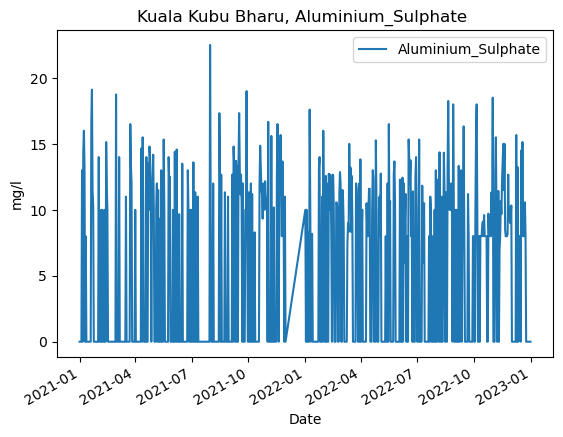

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rasa, Soda_Ash ')

Text(0, 0.5, 'mg/l')

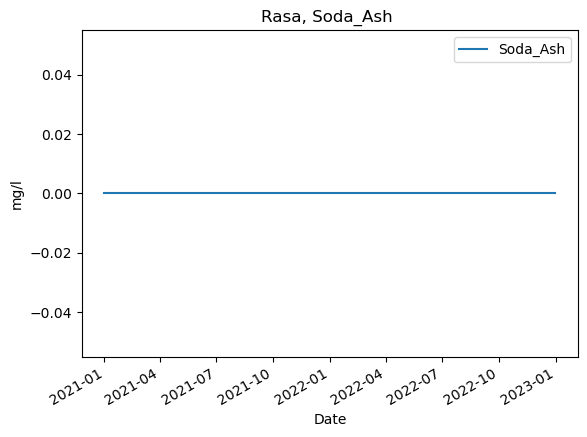

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rasa, Liquid_Chlorine ')

Text(0, 0.5, 'mg/l')

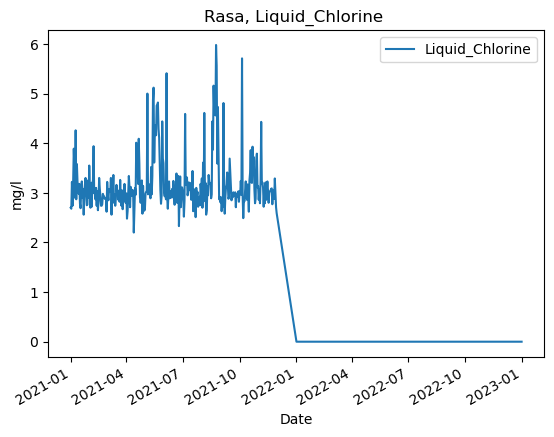

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rasa, Liquid_Polyaluminium_Chloride ')

Text(0, 0.5, 'mg/l')

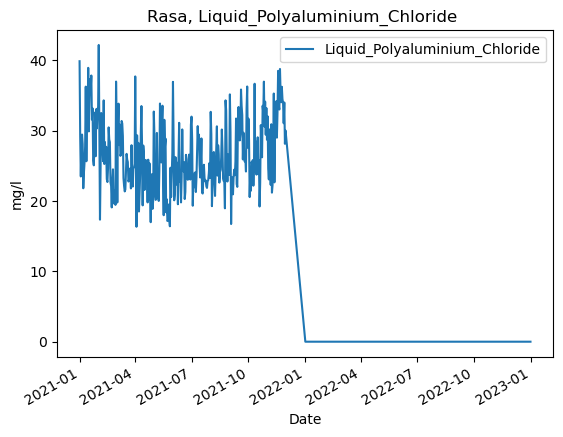

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rasa, Hydrated_Lime ')

Text(0, 0.5, 'mg/l')

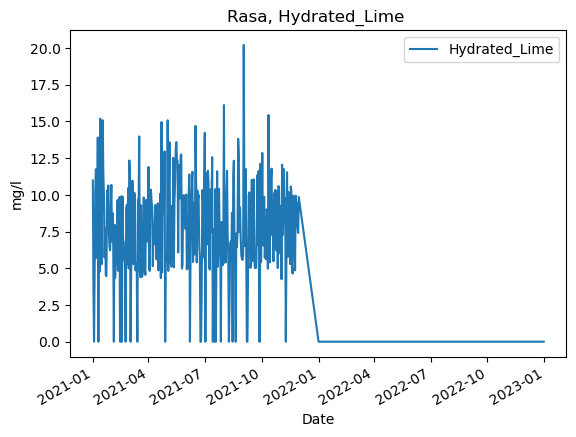

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Rasa, Aluminium_Sulphate ')

Text(0, 0.5, 'mg/l')

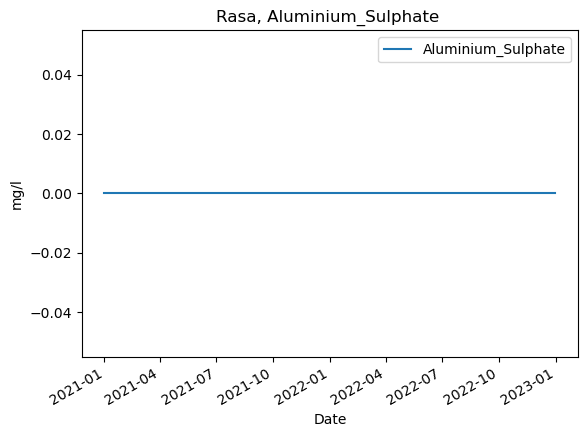

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 1, Soda_Ash ')

Text(0, 0.5, 'mg/l')

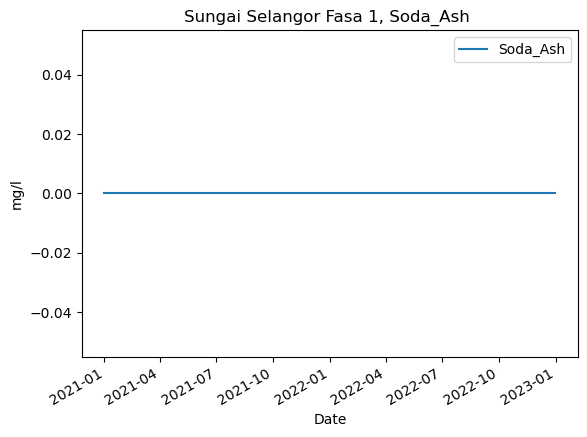

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 1, Liquid_Chlorine ')

Text(0, 0.5, 'mg/l')

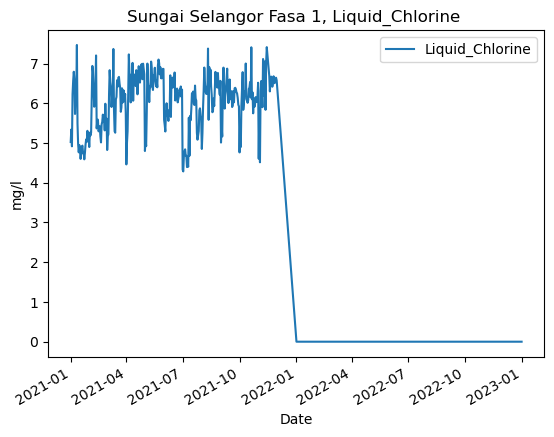

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 1, Liquid_Polyaluminium_Chloride ')

Text(0, 0.5, 'mg/l')

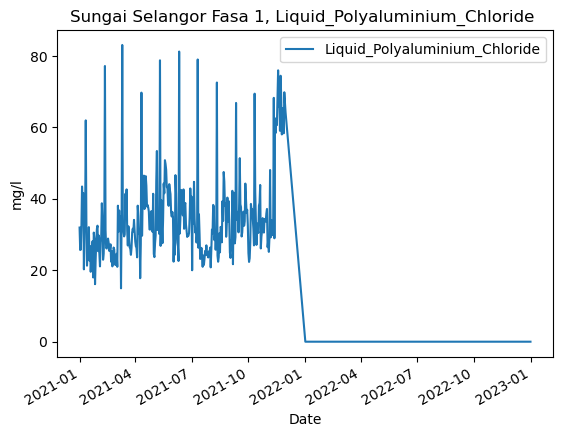

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 1, Hydrated_Lime ')

Text(0, 0.5, 'mg/l')

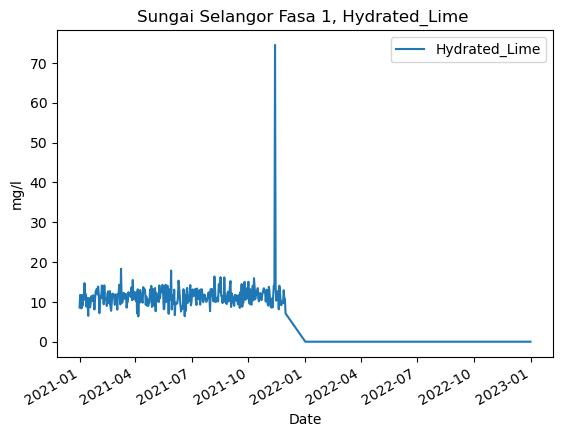

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 1, Aluminium_Sulphate ')

Text(0, 0.5, 'mg/l')

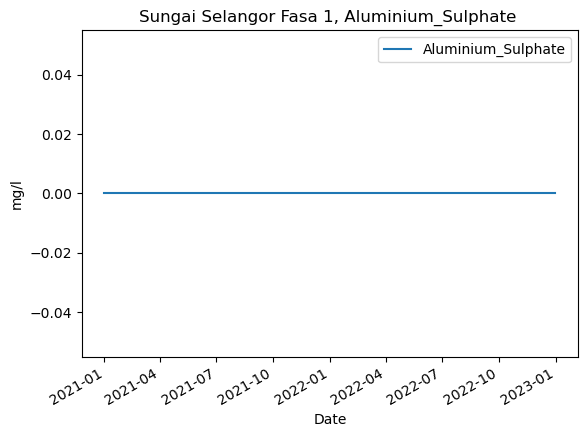

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 2 Stream C, Soda_Ash ')

Text(0, 0.5, 'mg/l')

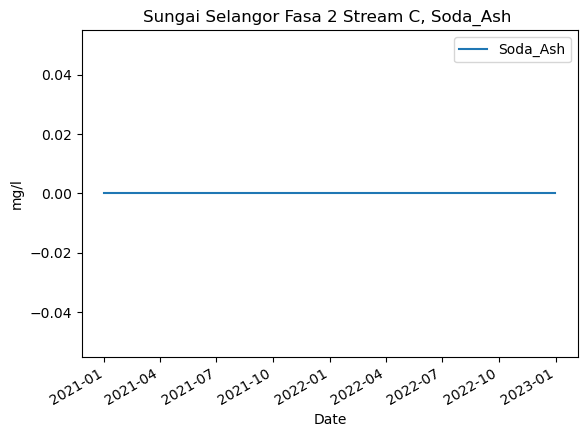

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 2 Stream C, Liquid_Chlorine ')

Text(0, 0.5, 'mg/l')

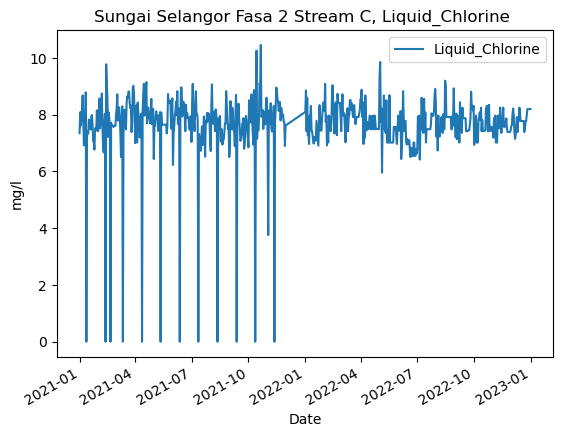

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 2 Stream C, Liquid_Polyaluminium_Chloride ')

Text(0, 0.5, 'mg/l')

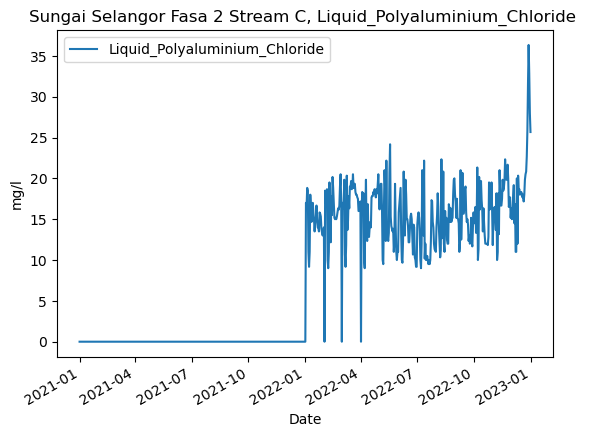

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 2 Stream C, Hydrated_Lime ')

Text(0, 0.5, 'mg/l')

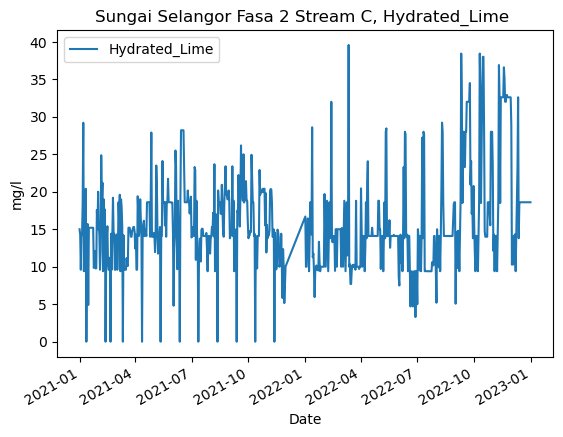

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 2 Stream C, Aluminium_Sulphate ')

Text(0, 0.5, 'mg/l')

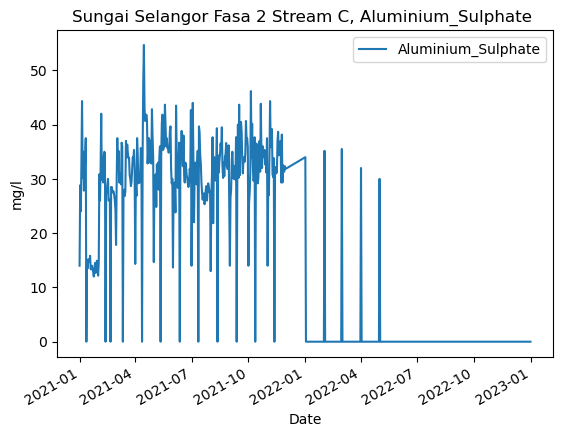

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 3, Soda_Ash ')

Text(0, 0.5, 'mg/l')

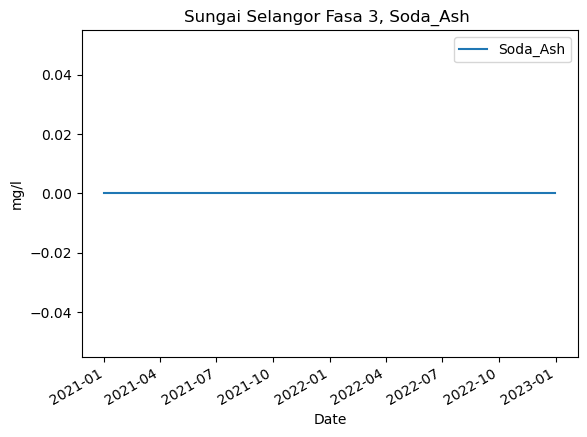

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 3, Liquid_Chlorine ')

Text(0, 0.5, 'mg/l')

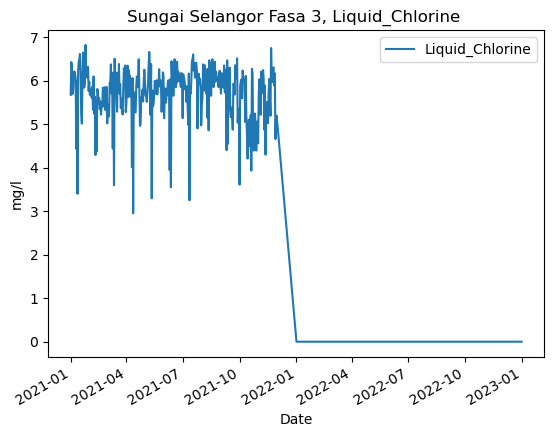

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 3, Liquid_Polyaluminium_Chloride ')

Text(0, 0.5, 'mg/l')

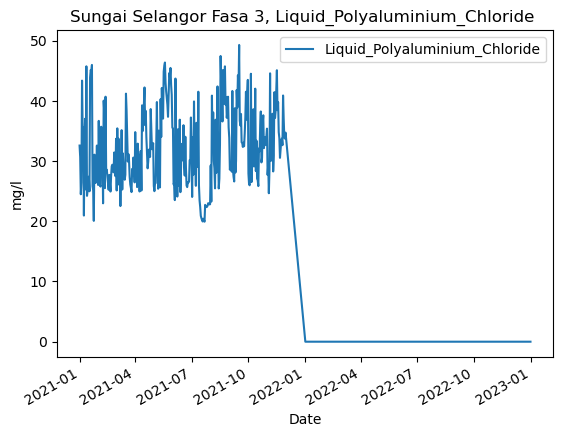

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 3, Hydrated_Lime ')

Text(0, 0.5, 'mg/l')

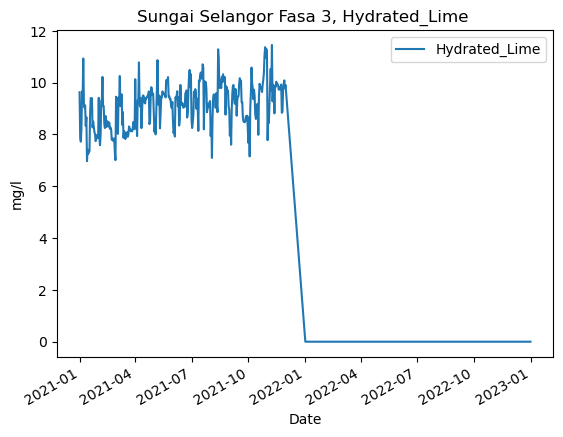

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Sungai Selangor Fasa 3, Aluminium_Sulphate ')

Text(0, 0.5, 'mg/l')

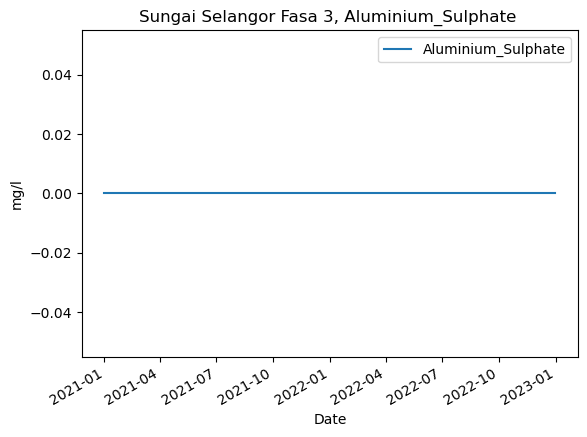

In [114]:
  
hi = [
       'Soda_Ash', 'Liquid_Chlorine',
       'Liquid_Polyaluminium_Chloride', 'Hydrated_Lime', 'Aluminium_Sulphate']
for i in jam8['wtp'].unique():
    for j in hi:
        a = jam8[jam8['wtp']==i].copy()
        a['Date'] = pd.to_datetime(a['Date'])
        #db['Month'] = db['Date'].dt.strftime('%m-%Y')

        a.plot(x='Date',y=[j])
        plt.title(f'{i}, {j} ')
        plt.ylabel('mg/l')


        plt.show()


## Unit Cost Comparison

In [ ]:
uc = pd.read_csv('unit_cost_v2.csv')
uc = uc.rename(columns={'n_wtp':'wtp','UnitCost (cent per m3)':'Unit_cost'})
uc1 = uc[uc['Year']==2021].copy()

In [ ]:
fc = pd.merge(c,uc1[['wtp','Month','Unit_cost']],on=['wtp','Month'],how='left')

## Graph

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Unit Cost Time Series Batang Kali Corr WGI:-0.13')

Text(0, 0.5, 'Score')

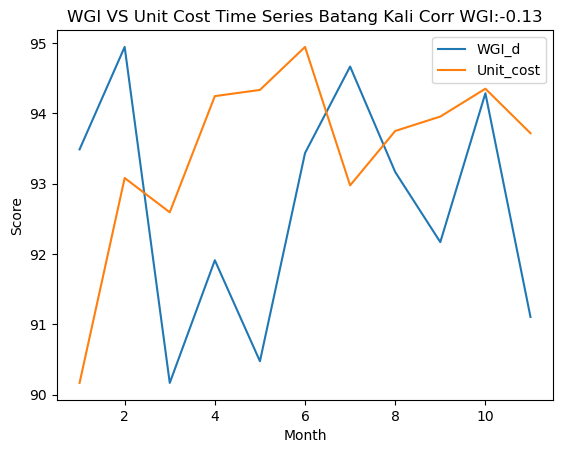

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Unit Cost Time Series Batang Kali Corr WQI:-0.26')

Text(0, 0.5, 'Score')

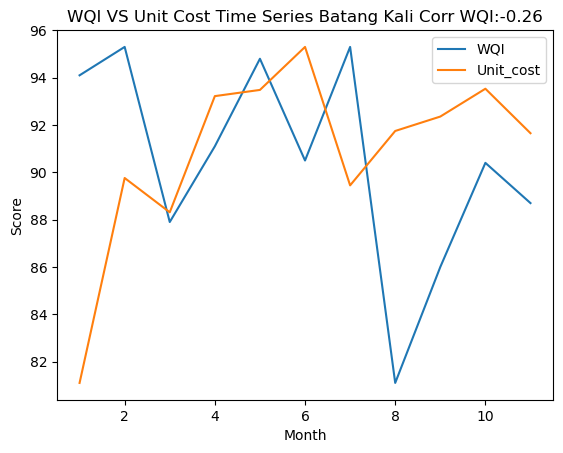

<AxesSubplot:>

Text(0.5, 1.0, 'Batang Kali')

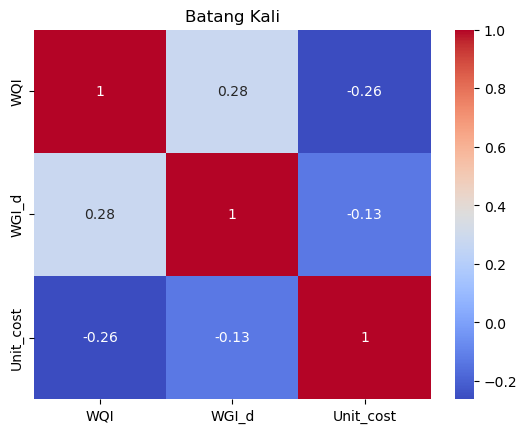

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Unit Cost Time Series Kuala Kubu Bharu Corr WGI:-0.63')

Text(0, 0.5, 'Score')

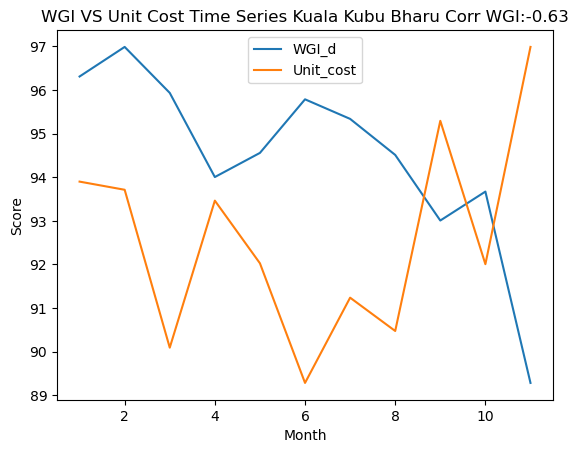

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Unit Cost Time Series Kuala Kubu Bharu Corr WQI:-0.18')

Text(0, 0.5, 'Score')

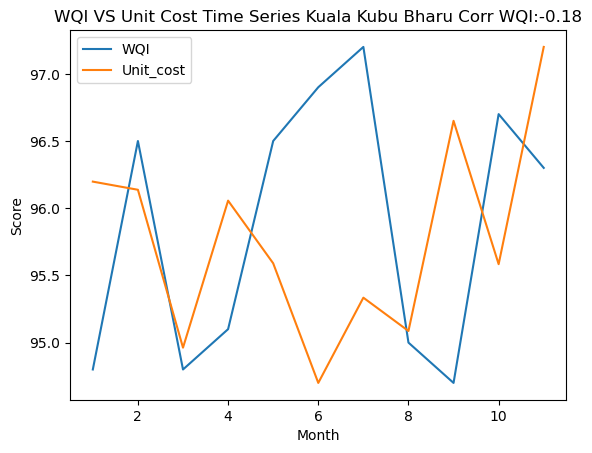

<AxesSubplot:>

Text(0.5, 1.0, 'Kuala Kubu Bharu')

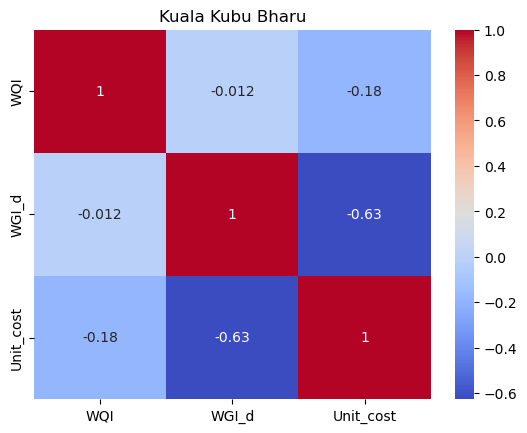

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Unit Cost Time Series Rantau Panjang New Corr WGI:-0.14')

Text(0, 0.5, 'Score')

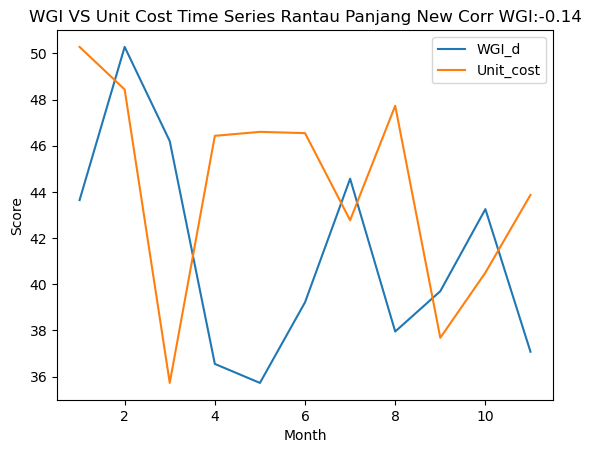

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Unit Cost Time Series Rantau Panjang New Corr WQI:-0.17')

Text(0, 0.5, 'Score')

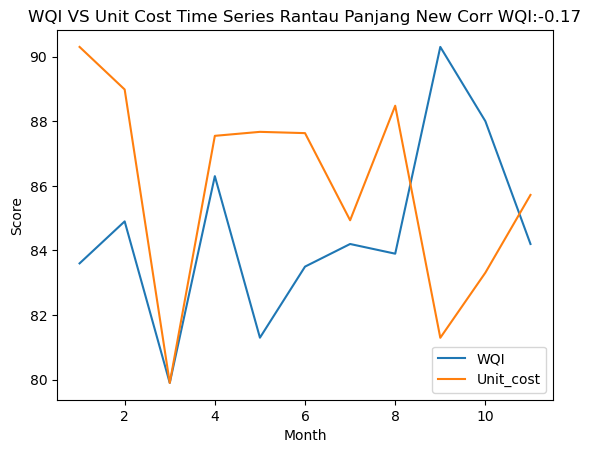

<AxesSubplot:>

Text(0.5, 1.0, 'Rantau Panjang New')

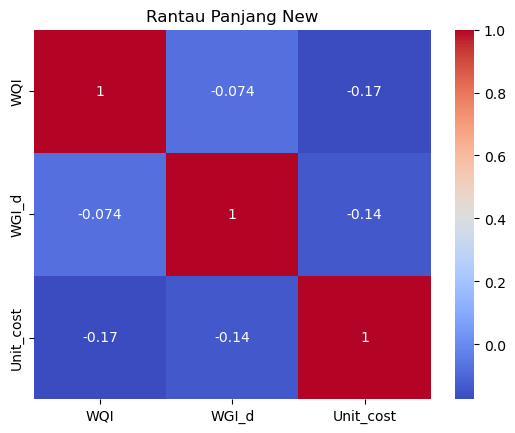

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Unit Cost Time Series Rantau Panjang Old Corr WGI:nan')

Text(0, 0.5, 'Score')

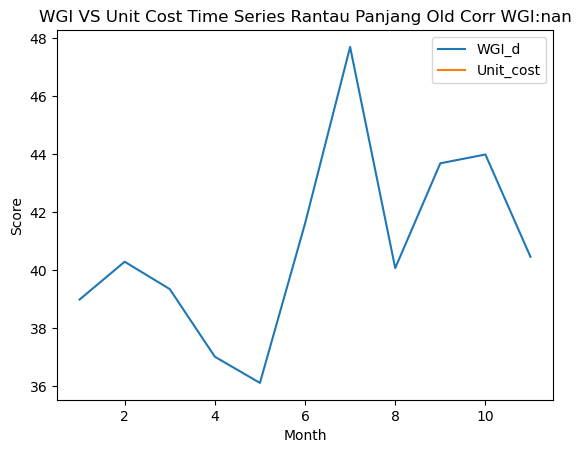

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Unit Cost Time Series Rantau Panjang Old Corr WQI:nan')

Text(0, 0.5, 'Score')

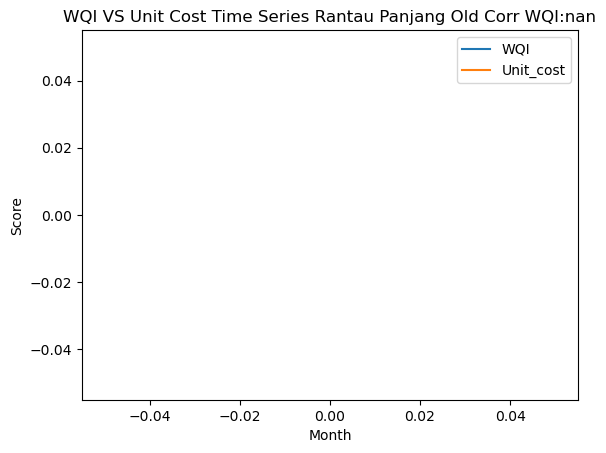

<AxesSubplot:>

Text(0.5, 1.0, 'Rantau Panjang Old')

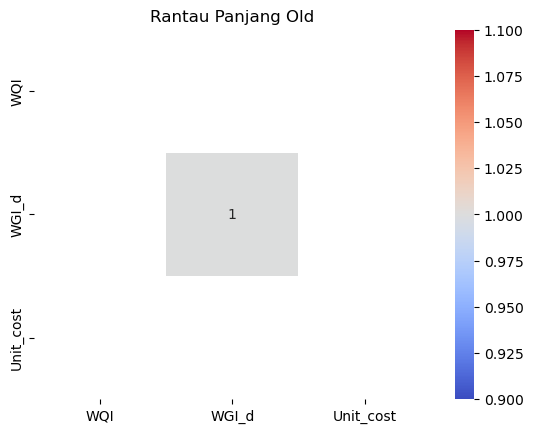

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Unit Cost Time Series Rasa Corr WGI:-0.4')

Text(0, 0.5, 'Score')

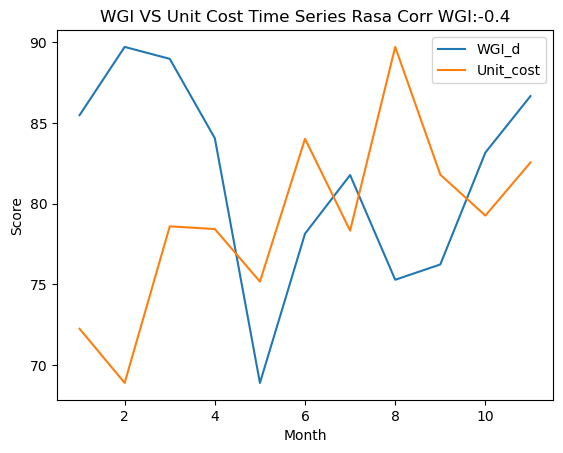

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Unit Cost Time Series Rasa Corr WQI:-0.3')

Text(0, 0.5, 'Score')

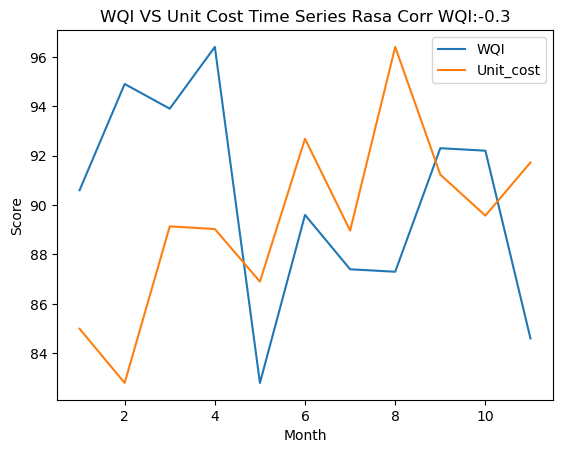

<AxesSubplot:>

Text(0.5, 1.0, 'Rasa')

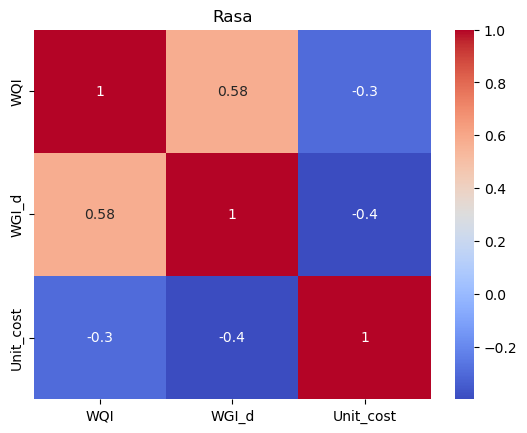

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Unit Cost Time Series Sungai Rangkap Corr WGI:-0.33')

Text(0, 0.5, 'Score')

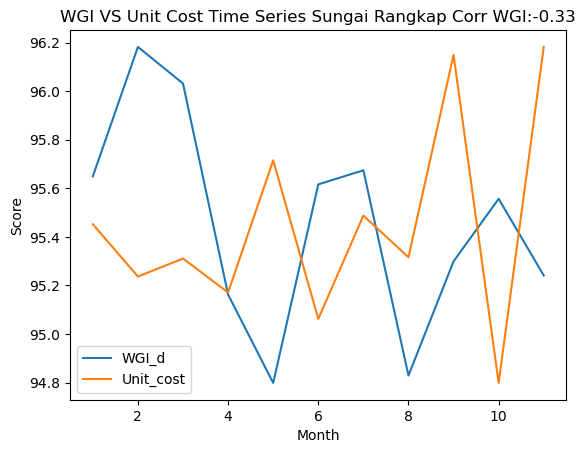

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Unit Cost Time Series Sungai Rangkap Corr WQI:0.08')

Text(0, 0.5, 'Score')

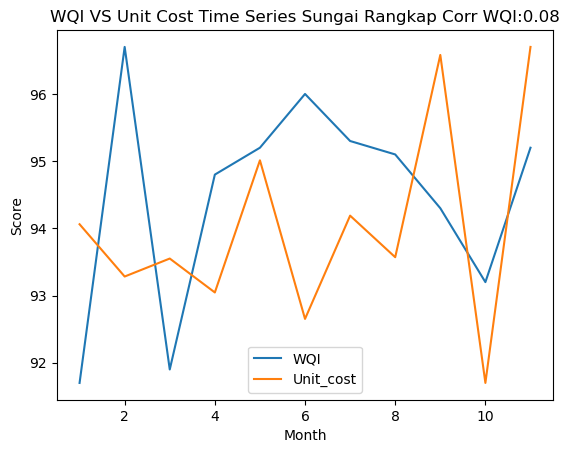

<AxesSubplot:>

Text(0.5, 1.0, 'Sungai Rangkap')

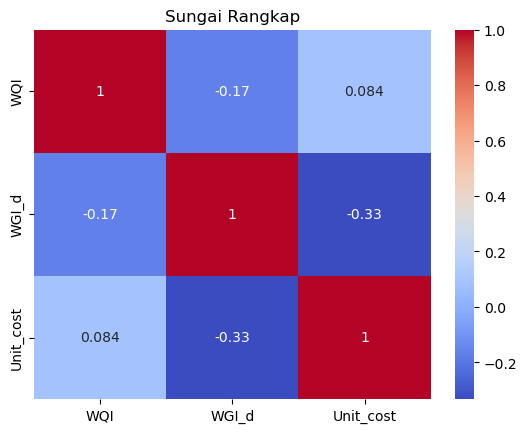

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Unit Cost Time Series Sungai Selangor Fasa 1 Corr WGI:-0.81')

Text(0, 0.5, 'Score')

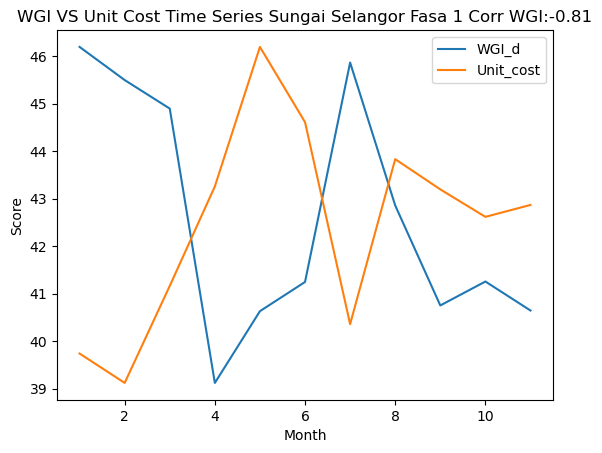

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Unit Cost Time Series Sungai Selangor Fasa 1 Corr WQI:0.24')

Text(0, 0.5, 'Score')

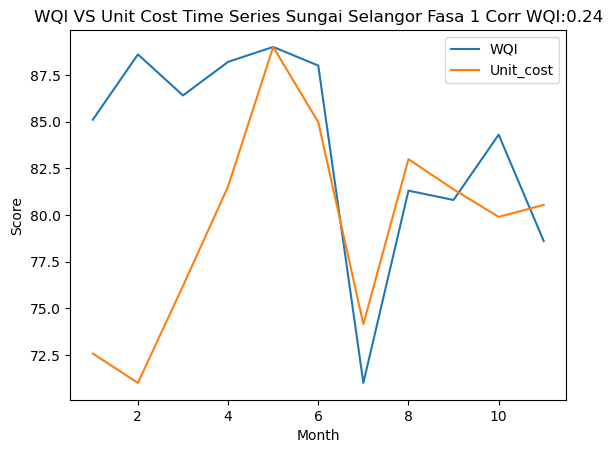

<AxesSubplot:>

Text(0.5, 1.0, 'Sungai Selangor Fasa 1')

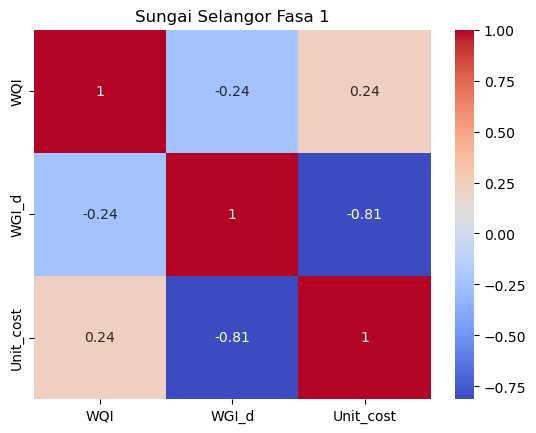

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Unit Cost Time Series Sungai Selangor Fasa 2 Stream C Corr WGI:-0.83')

Text(0, 0.5, 'Score')

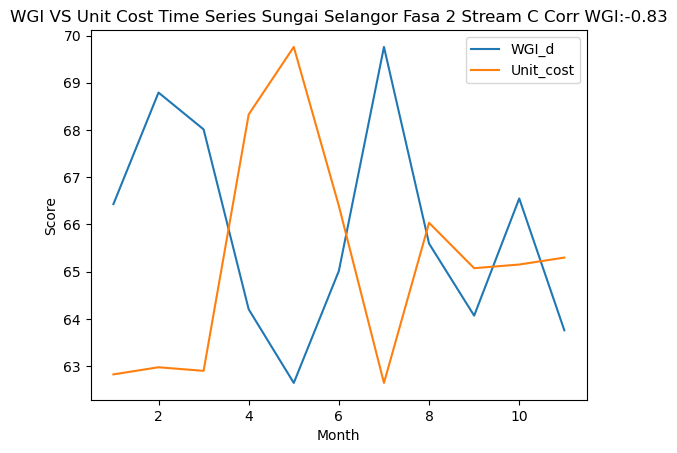

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Unit Cost Time Series Sungai Selangor Fasa 2 Stream C Corr WQI:0.03')

Text(0, 0.5, 'Score')

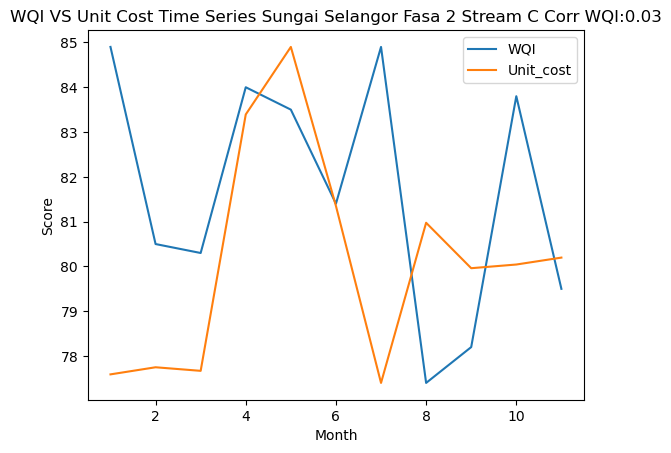

<AxesSubplot:>

Text(0.5, 1.0, 'Sungai Selangor Fasa 2 Stream C')

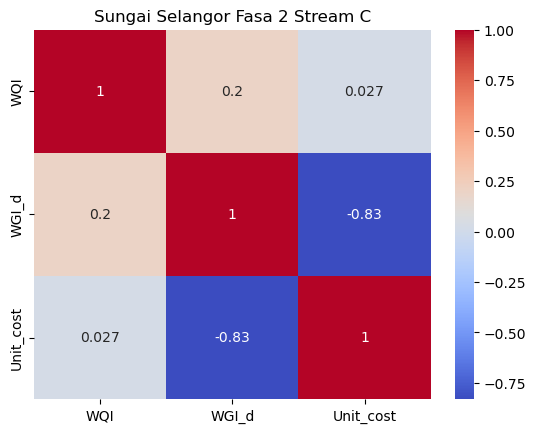

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WGI VS Unit Cost Time Series Sungai Selangor Fasa 3 Corr WGI:nan')

Text(0, 0.5, 'Score')

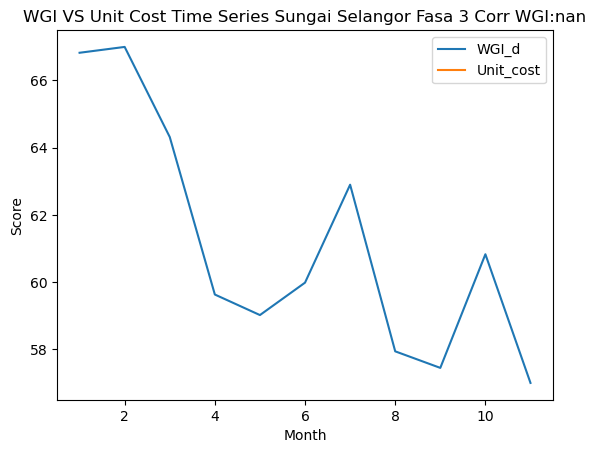

<AxesSubplot:xlabel='Month'>

Text(0.5, 1.0, 'WQI VS Unit Cost Time Series Sungai Selangor Fasa 3 Corr WQI:nan')

Text(0, 0.5, 'Score')

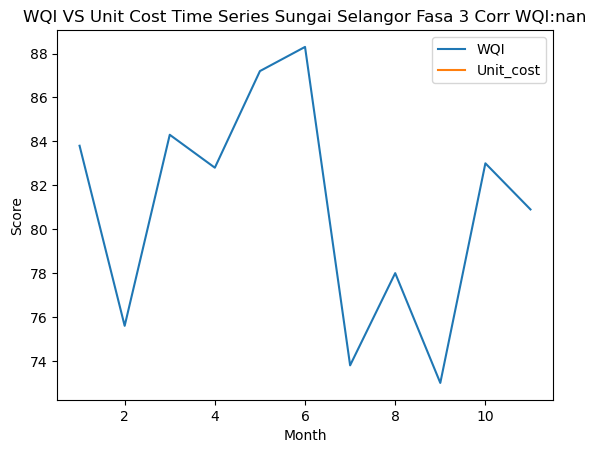

<AxesSubplot:>

Text(0.5, 1.0, 'Sungai Selangor Fasa 3')

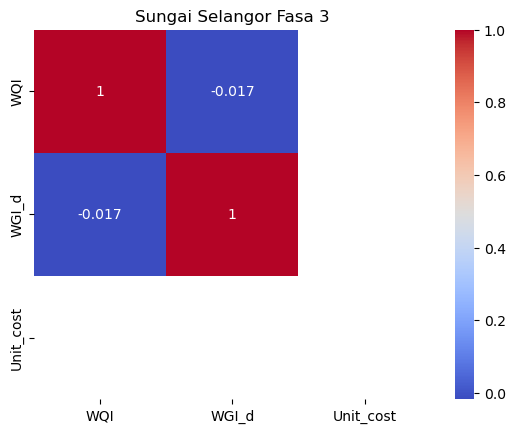

In [ ]:
fr = pd.merge(fc,master_db[['wtp']],on = 'wtp',how = 'left')

fr = fr[(fr['Lembangan'] == 'Sg Selangor')]

columns_target = 'wtp'
core_unit_wgi = []
core_unit_wqi = []
wtp_corr = []

for i in fr[columns_target].unique():
 
    core = fr[fr[columns_target] == i][['WQI','WGI_d','Unit_cost']].corr()
    core_unit_wgi.append(core['Unit_cost'][1])
    corr_val =round(core['Unit_cost'][1],2)
    corr_val2 =round(core['Unit_cost'][0],2)
    core_unit_wqi.append(core['Unit_cost'][0])
    
    a = fr[fr['wtp']==i].copy()
    scaler = MinMaxScaler(feature_range=(a['WGI_d'].min(), a['WGI_d'].max()))
    scaler2 = MinMaxScaler(feature_range=(a['WQI'].min(), a['WQI'].max()))
    a['Unit_cost'] = scaler.fit_transform(a[['Unit_cost']])
    #a['WQI'] = scaler.fit_transform(a[['WQI']])
    a.plot(x='Month',y=['WGI_d','Unit_cost'])
    plt.title(f'WGI VS Unit Cost Time Series {i} Corr WGI:{corr_val}')
    plt.ylabel('Score')
    plt.show()

    a['Unit_cost'] = scaler2.fit_transform(a[['Unit_cost']])
    a.plot(x='Month',y=['WQI','Unit_cost'])
    plt.title(f'WQI VS Unit Cost Time Series {i} Corr WQI:{corr_val2}')
    plt.ylabel('Score')
    plt.show()
    wtp_corr.append(i) 
    sns.heatmap(core, annot=True, cmap='coolwarm')
    plt.title(i)
    plt.show()

data = {'wtp': wtp_corr,
        'corr_wgi_unit': core_unit_wgi,
        'corr_wqi_unit': core_unit_wqi}
  
# Create DataFrame
corr2_df = pd.DataFrame(data)

In [ ]:
print(corr2_df.sort_values('corr_wgi_unit')) 
corr2_df.to_csv('Plot\Result\correlation_unified_weight_WGI_Sg_Selangor_6.csv')

                               wtp  corr_wgi_unit  corr_wqi_unit
7  Sungai Selangor Fasa 2 Stream C      -0.829965       0.026807
6           Sungai Selangor Fasa 1      -0.812098       0.238502
1                 Kuala Kubu Bharu      -0.626792      -0.183100
4                             Rasa      -0.399132      -0.296260
5                   Sungai Rangkap      -0.332220       0.084324
2               Rantau Panjang New      -0.140027      -0.174018
0                      Batang Kali      -0.130143      -0.261800
3               Rantau Panjang Old            NaN            NaN
8           Sungai Selangor Fasa 3            NaN            NaN
